# Data Science and Machine Learning - Project "Segmentation"

## Business Understanding

The LaGoste Stores is a company operating in the fashion, sports and luxury sector. They sell products from 5 major categories: Sneakers, Rackets, T-Shirts, Watches and Hats. These five categories can be also be divided in Premium Brand material and more mainstream articles. The Customers can order and acquire those products through 3 channel groups: Physical stores, quaterly catalogs and the companies’ website. 

## Segmentation Analysis

The objective of this analysis is to identify actionable segments within the company's Customer base.

<u>Customer Value:</u> Evaluate segments of customers in terms of the amount spent on purchases. 
- Variables: Recency, Year_Birth, Income, Dt_Customer, NumCatalogPurchases, NumStorePurchases,NumWebPurchases,  NumDealsPurchases, NumWebVisitsMonth, Has_Kidhome, Has_Teenhome, Complain

<u>Product Usage:</u> Divide the customers based on they needs and interests, taking into consideration their product usage. 
- Products: Sneakers, TShirts, Hats, Watches, Rackets and Premium material

# Index

#### [1. Exploratory Data Analysis](#EDA)
#### [1.1 Data Describe](#Describe)
#### [1.2 Handling Missing Data](#Missing)
#### [1.3 Feature Creation & Transformation](#Transformation)
#### [1.4 Graphical Analysis](#Graphical)
#### [1.5 Outliers](#Outliers)
#### [1.6 Correlations](#Correlations)
#### [1.7 Variables Normalization](#Normalization)

### [2. Customer Value Segmentation](#Customer)
#### [2.1 K-means](#KMeans)
#### [2.2 DBSCAN](#DBSCAN)
#### [2.3 Hierarchical Clustering](#Hierarchical)
#### [2.4 K-medoids](#KMedoids)

### [3. Product Usage Segmentation](#Product)
#### [3.1 K-means](#PKMeans)
#### [3.2 DBSCAN](#PDBSCAN)
#### [3.3 Hierarchical Clustering](#PHierarchical)
#### [3.4 K-medoids](#PKMedoids)


### Import Packages

In [1]:
from datetime import datetime, date, timedelta

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import linear_model, metrics

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Dataset

Import the dataset and define the index of the dataframe with the column `Custid`.

In [2]:
data = pd.read_excel(r'Group29_LaGoste_Campaign.xlsx')
data.set_index('Custid', inplace=True)

#### Variable Description

| Variable | Description |
| :---        |    :----   | 
| AcceptedCmp1 | Flag indicating customer accepted offer in campaign 1 |
| AcceptedCmp2 | Flag indicating customer accepted offer in campaign 2 |
| AcceptedCmp3 | Flag indicating customer accepted offer in campaign 3 |
| AcceptedCmp4 | Flag indicating customer accepted offer in campaign 4 |
| AcceptedCmp5 | Flag indicating customer accepted offer in campaign 5 |
| Complain | Flag indicating if customer has complained |
| Custid | Customer ID |
| DepVar | Binary variable indicating if customer accepted (1) or not (0) a marketing offer from current campaign. Dependent  variable of the problem. (Only applicable on the predictive problem) |
| Dt_Customer | Date of customer's enrolment with the company |
| Education | Level of education of Customer |
| Income | Yearly Income of household of Customer |
| Kidhome|  Number of kids in household |
| Marital_Status | Marital Status of Customer |
| MntSneakers | Amount spent on Sneakers |
| MntRackets | Amount spent on Rackets |
| MntTShirts | Amount spent on Tshirts |
| MntWatches | Amount spent on Watches |
| MntHats | Amount spent on Hats |
| MntPremium_Brand | Amount spent on Premium material |
| NumCatalogPurchases | Number of purchases made through catalog |
| NumStorePurchases | Number of purchases made through store |
| NumDealsPurchases | Number of purchases made with discounts |
| NumWebPurchases | Number of purchases made through web |
| NumWebVisitsMonth | Average number of web visits a month to the company site |
| Recency | Number of days since last purchase |
| Teenhome | Number of teenagers in household |
| Year_Birth | Customer's Year of birth |
 

<a id='EDA'></a>

## 1. Exploratory Data Analysis

<a id='Describe'></a>
### 1.1 Data Describe

The dataset has 2500 rows, 20 integer variables, 3 float variables, one datetime variable and 2 object class variables.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2500.0,1971.762400,12.178459,1944.0,1962.0,1973.0,1981.00,1998.0
Income,2471.0,63494.125860,28702.802728,1134.0,41758.0,62618.0,83117.50,195163.0
Kidhome,2500.0,0.439200,0.529920,0.0,0.0,0.0,1.00,2.0
Teenhome,2500.0,0.496000,0.543785,0.0,0.0,0.0,1.00,2.0
Recency,2500.0,49.118000,28.835531,0.0,24.0,49.0,73.00,99.0
MntSneakers,2500.0,305.167600,336.688329,0.0,25.0,177.0,505.25,1492.0
MntTShirts,2500.0,39.352000,57.913495,0.0,3.0,14.0,50.00,296.0
MntRackets,2500.0,273.952000,387.629423,0.0,24.0,107.0,374.00,2548.0
MntWatches,2500.0,24.948000,36.958643,0.0,2.0,8.0,32.00,180.0
MntHats,2461.0,53.086144,79.358448,0.0,4.0,16.0,68.00,398.0


In [4]:
data.describe(include=['O']).T

,count,unique,top,freq
Education,2500,5,Graduation,1212
Marital_Status,2500,5,Married,973


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 20004103 to 20044095
Data columns (total 26 columns):
Year_Birth             2500 non-null int64
Education              2500 non-null object
Marital_Status         2500 non-null object
Income                 2471 non-null float64
Kidhome                2500 non-null int64
Teenhome               2500 non-null int64
Dt_Customer            2500 non-null datetime64[ns]
Recency                2500 non-null int64
MntSneakers            2500 non-null int64
MntTShirts             2500 non-null int64
MntRackets             2500 non-null int64
MntWatches             2500 non-null int64
MntHats                2461 non-null float64
MntPremium_Brand       2454 non-null float64
NumDealsPurchases      2500 non-null int64
NumWebPurchases        2500 non-null int64
NumCatalogPurchases    2500 non-null int64
NumStorePurchases      2500 non-null int64
NumWebVisitsMonth      2500 non-null int64
AcceptedCmp2           2500 non-null int64
Accep

<a id='Missing'></a>
### 1.2 Handling Missing Data

There are 3 variables with missing values: `Income`, `MntHats` and `MntPremium_Brand`. The following table shows the assumptions assumed:

| Variable | Criteria |
| :---        |    :----   | 
| Income | Income's mean, contingent on the customer's education level |
| MntHats | Should the value be missing, an amount of 0.0mu is assumed. |
| MntPremium_Brand | Should the value be missing, an amount of 0.0mu is assumed. |

In [6]:
# Proportion of missing values
data.isna().sum() / len(data)

Year_Birth             0.0000
Education              0.0000
Marital_Status         0.0000
Income                 0.0116
Kidhome                0.0000
Teenhome               0.0000
Dt_Customer            0.0000
Recency                0.0000
MntSneakers            0.0000
MntTShirts             0.0000
MntRackets             0.0000
MntWatches             0.0000
MntHats                0.0156
MntPremium_Brand       0.0184
NumDealsPurchases      0.0000
NumWebPurchases        0.0000
NumCatalogPurchases    0.0000
NumStorePurchases      0.0000
NumWebVisitsMonth      0.0000
AcceptedCmp2           0.0000
AcceptedCmp3           0.0000
AcceptedCmp4           0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
Complain               0.0000
DepVar                 0.0000
dtype: float64

In [7]:
# Replace the income's missing values using its mean, contingent on the customer's education level
data['Income'] = data[['Education', 'Income']].groupby('Education').transform(lambda x: x.fillna(x.mean()))
# Replace the MntHats and MntPremium_Brand's missing values with 0.0 mu
data.fillna(0, inplace=True)

<a id='Transformation'></a>
### 1.3 Feature Creation & Transformation

We created some additional features which we felt could improve the analysis.

In [8]:
# Creation of the Total_Spending variable: Total amount spent in the company
data['Total_Spending'] = data[['MntSneakers','MntRackets','MntTShirts','MntWatches','MntHats']].sum(axis = 1)

# Creation of the Total_Purchases variable: Total number of purchases
data['Total_Purchases'] = data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 1)

#### Coherence Checking

- Compare total spending to the amount spent on premium material

In [9]:
data[(data['MntPremium_Brand'] > data['Total_Spending']) ]  

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20023327,1990,Basic,Together,16865.0,1,0,2016-06-17,60,0,3,2,4,2.0,12.0,1,5,2,3,6,0,0,0,0,0,0,0,11.0,10


In [10]:
if((data['MntPremium_Brand']>data['Total_Spending']).any()):
    data.loc[data['MntPremium_Brand']>data['Total_Spending'], 'MntPremium_Brand']=data['Total_Spending']

- Compare total purchases to the number of purchases made with discounts

In [11]:
data[(data['NumDealsPurchases'] > data['Total_Purchases'])]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20010855,1977,Graduation,Divorced,3377.000000,1,0,2015-11-22,65,7,1,10,1,2.0,3.0,15,1,0,0,20,0,0,0,0,0,0,0,21.0,1
20011147,1961,Graduation,Married,3699.000000,1,1,2016-06-16,68,3,0,1,1,0.0,2.0,15,0,0,0,20,0,0,0,0,0,0,0,5.0,0
20014003,1952,2n Cycle,Together,6374.000000,0,0,2017-05-01,72,22,3,12,3,9.0,2.0,15,1,0,1,19,0,0,0,1,0,0,0,49.0,2
20016651,1974,2n Cycle,Married,4306.000000,1,0,2016-09-25,52,2,4,6,2,4.0,2.0,15,1,0,0,20,0,0,0,0,0,0,0,18.0,1
20017743,1981,Graduation,Married,3914.000000,1,0,2016-02-17,80,2,2,5,1,2.0,6.0,15,1,0,0,20,0,0,0,0,0,0,0,12.0,1
20022803,1972,PhD,Together,7259.000000,0,1,2016-09-06,81,64,8,36,1,4.0,10.0,15,1,1,1,20,0,0,0,0,0,0,0,113.0,3
20034555,1951,PhD,Together,4585.000000,0,1,2016-03-29,19,24,0,4,0,0.0,2.0,15,1,0,1,20,0,0,0,0,0,0,0,28.0,2
20034587,1981,PhD,Married,10150.000000,0,0,2016-03-29,86,111,6,120,8,4.0,6.0,15,1,1,1,19,0,0,1,1,0,0,0,249.0,3
20040867,1988,Basic,Together,52913.996528,0,0,2016-09-13,53,1,1,5,1,3.0,3.0,15,1,0,0,20,0,0,0,0,0,0,0,11.0,1


In [12]:
if((data['NumDealsPurchases']>data['Total_Purchases']).any()):
    data.loc[data['NumDealsPurchases']>data['Total_Purchases'], 'NumDealsPurchases']=data['Total_Purchases']

- Find cases where the total amount spent is positive but there are no purchases. In this cases we assume that was one purchase in web channel, given its the channel with the highest number of purchases

In [13]:
data[((data['Total_Spending']>0 ) & (data['Total_Purchases']==0))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20011147,1961,Graduation,Married,3699.0,1,1,2016-06-16,68,3,0,1,1,0.0,2.0,0,0,0,0,20,0,0,0,0,0,0,0,5.0,0
20034115,1968,Basic,Divorced,186126.0,0,0,2016-11-02,29,1,0,2,1,2.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,6.0,0
20035187,1987,Graduation,Single,2785.0,0,0,2016-05-10,82,2,1,3,0,1.0,1.0,0,0,0,0,19,0,0,0,0,0,0,0,7.0,0
20040651,1962,Graduation,Married,6377.0,0,1,2016-10-04,57,2,0,1,0,0.0,1.0,0,0,0,0,20,0,0,0,0,0,0,0,3.0,0


In [14]:
print(data[['NumWebPurchases']].sum(axis = 0))
print(data[['NumStorePurchases']].sum(axis = 0))
print(data[['NumCatalogPurchases']].sum(axis = 0))

NumWebPurchases    19899
dtype: int64
NumStorePurchases    16937
dtype: int64
NumCatalogPurchases    11948
dtype: int64


In [15]:
if((data['Total_Spending']>0).any() & (data['Total_Purchases']==0).any()):
    data.loc[(data['Total_Spending']>0) & (data['Total_Purchases']==0), 'Total_Purchases']=1
    data.loc[(data['Total_Spending']>0) & (data['Total_Purchases']==0), 'NumWebPurchases']=1

- Analyze cases where the web purchase amount is greater than zero, but there are no web purchases. This is fine because the number of monthly web visits is a monthly average.

In [16]:
# Analyze cases where the web purchase amount is not zero, but the number of web purchases is
data[(data['NumWebPurchases'] > 0) & (data['NumWebVisitsMonth'] == 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20007103,1976,2n Cycle,Married,92570.0,0,0,2016-09-25,19,190,29,327,31,360.0,297.0,1,6,6,9,0,0,0,0,0,0,0,0,937.0,21
20011463,1986,Graduation,Married,194482.0,0,0,2016-10-30,41,55,14,67,18,5.0,4.0,0,1,1,1,0,0,0,1,1,0,0,0,159.0,3
20013339,1984,Graduation,Single,9312.0,0,0,2016-10-01,53,120,5,43,9,14.0,5.0,15,1,26,1,0,0,0,1,0,0,0,0,191.0,28
20014127,1988,Master,Single,82416.0,0,0,2016-12-12,47,221,24,405,15,32.0,7.0,1,5,5,14,0,0,0,0,0,0,0,0,697.0,24
20015323,1975,2n Cycle,Married,7509.0,0,1,2017-04-07,99,37,3,2522,6,7.0,8.0,15,1,26,1,0,0,0,0,1,0,0,0,2575.0,28
20015423,1954,Graduation,Single,194400.0,0,0,2015-12-28,45,27,29,81,3,24.0,11.0,0,1,1,1,0,0,0,0,0,0,0,0,164.0,3
20016391,1952,Master,Married,193329.0,0,1,2017-06-26,63,23,3,2473,2,3.0,2.0,15,1,26,1,0,0,0,0,0,0,0,0,2504.0,28
20016459,1967,Graduation,Married,84762.0,0,0,2017-01-30,63,185,81,615,70,92.0,221.0,1,6,5,7,0,0,0,0,0,0,0,0,1043.0,18
20017023,1986,Graduation,Single,195163.0,0,0,2017-04-21,35,36,23,129,2,21.0,12.0,0,1,1,1,0,0,0,0,0,0,0,0,211.0,3


#### Date related variables

In [17]:
# Creation of the Tenure variable: Tenure's Age
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Tenure'] = (datetime.now() - data['Dt_Customer']) / timedelta(days=365)
data['Tenure'].apply(np.floor)

# Creation of the Age variable: Customer's Age
data['Age']=date.today().year- data['Year_Birth']

#### Income related variables

In [18]:
# Creation of the Income_Spent variable: Proportion of the income spent per customer
data['Income_Spent'] = data['Total_Spending'] / data['Income']

# Creation of the Avg_Spent variable: Average of the amount spent
data['Avg_Spent'] = data['Total_Spending'] / data['Total_Purchases']

#### Categorical Variables

In [19]:
# Creation of features related with dependents (Kids and Teens)
data['Has_Kidhome'] = np.where((data['Kidhome']>=1),1,0)                          # has at least one kid
data['Has_Teenhome'] = np.where((data['Teenhome']>=1),1,0)                        # has at least one teen
data['Has_Dependant'] = data[['Has_Kidhome','Has_Teenhome']].values.max(axis=1)   # has at least one kid or teen

# Creation of features related with Education
data['Higher_Education'] = np.where(np.isin(data.Education, ['Graduation', 'Master', 'PhD']), 1, 0)
data['Education'] = data['Education'].astype('category')

# Creation of features related with Marital_Status
data['Is_Single'] = np.where(np.isin(data.Marital_Status, ['Single', 'Widow', 'Divorced']), 1, 0)
data['Marital_Status'] = data['Marital_Status'].astype('category')

#### Purchases related variables

Amounts and number of purchases as relative measures

In [20]:
data['WebPurchases'] = data['NumWebPurchases'] / data['Total_Purchases']
data['StorePurchases'] = data['NumStorePurchases'] / data['Total_Purchases']
data['CatalogPurchases'] = data['NumCatalogPurchases'] / data['Total_Purchases']
data['Deals'] = data['NumDealsPurchases'] / data['Total_Purchases']

data['Sneakers'] = data['MntSneakers'] / data['Total_Spending']
data['Rackets'] = data['MntRackets'] / data['Total_Spending']
data['TShirts'] = data['MntTShirts'] / data['Total_Spending']
data['Watches'] = data['MntWatches'] / data['Total_Spending']
data['Hats'] = data['MntHats'] / data['Total_Spending']
data['Premium'] = data['MntPremium_Brand'] / data['Total_Spending']

#### Created Variables Description

| Variable | Description |
| :---        |    :----   | 
| Tenure | Tenure years, rounded down |
| Age | Customer age, in years |
| Total_Spending | Total amount spent |
| Income_Spent | Percentage of the income spent |
| Total_Purchases | Number of total purchases |
| Avg_Spent | Average income spent per purchase |
| StorePurchases | Percentage of Store Purchases |
| WebPurchases |  Percentage of Web Purchases|
| CatalogPurchases |  Percentage of Catalog Purchases |
| Deals | Percentage of Deal Purchases |
| Sneakers | Percentage of amount spent in Sneakers |
| Rackets | Percentage of amount spent in Rackets |
| TShirts | Percentage of amount spent in Tshirts |
| Watches | Percentage of amount spent in Watches |
| Hats | Percentage of amount spent in Hats |
| Premium | Percentage of amount spent in Premium Brand |
| Higher_Education | Customer has a higher education degree | 
| Is_Single | Customer is single |



<a id='Graphical'></a>
### 1.4 Graphical Analysis

Graphical analysis between numerical and categorical variables.

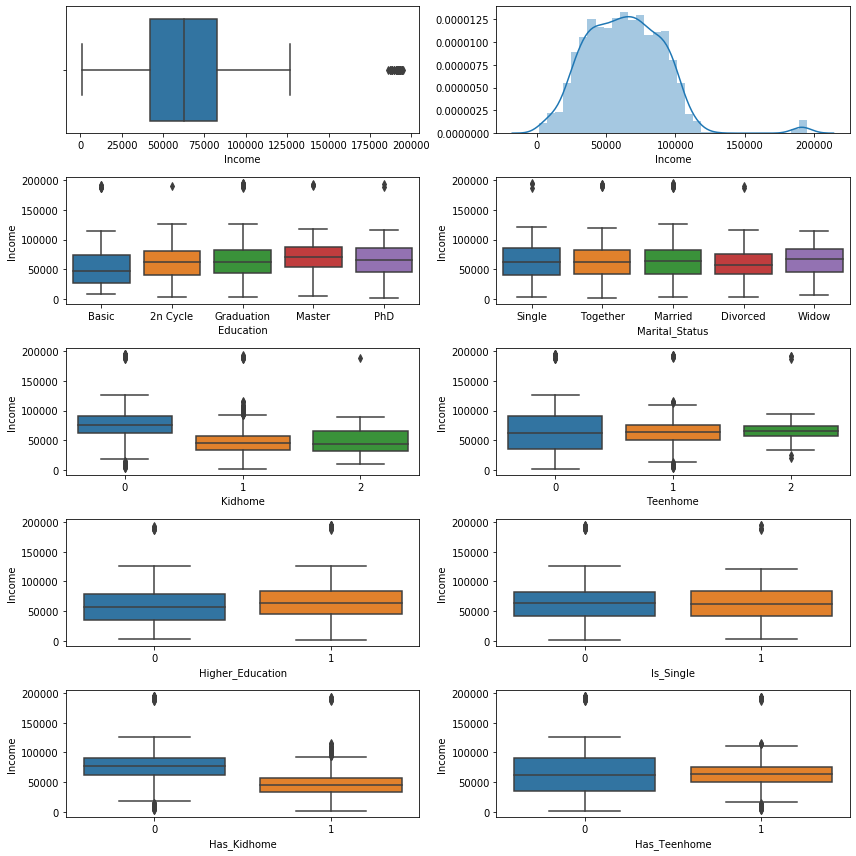

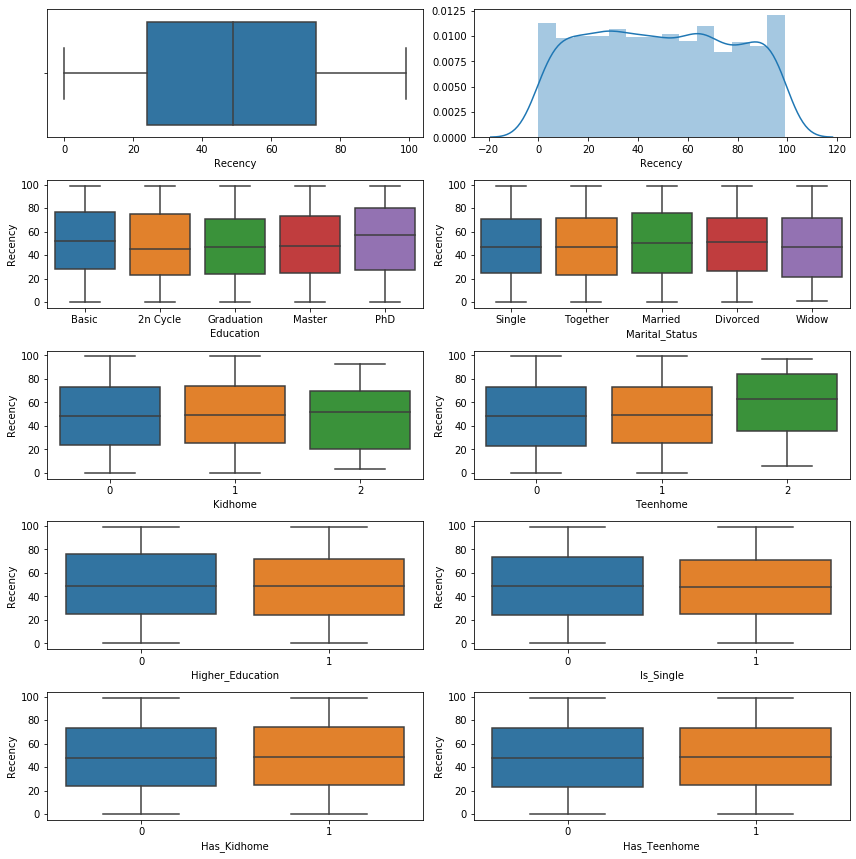

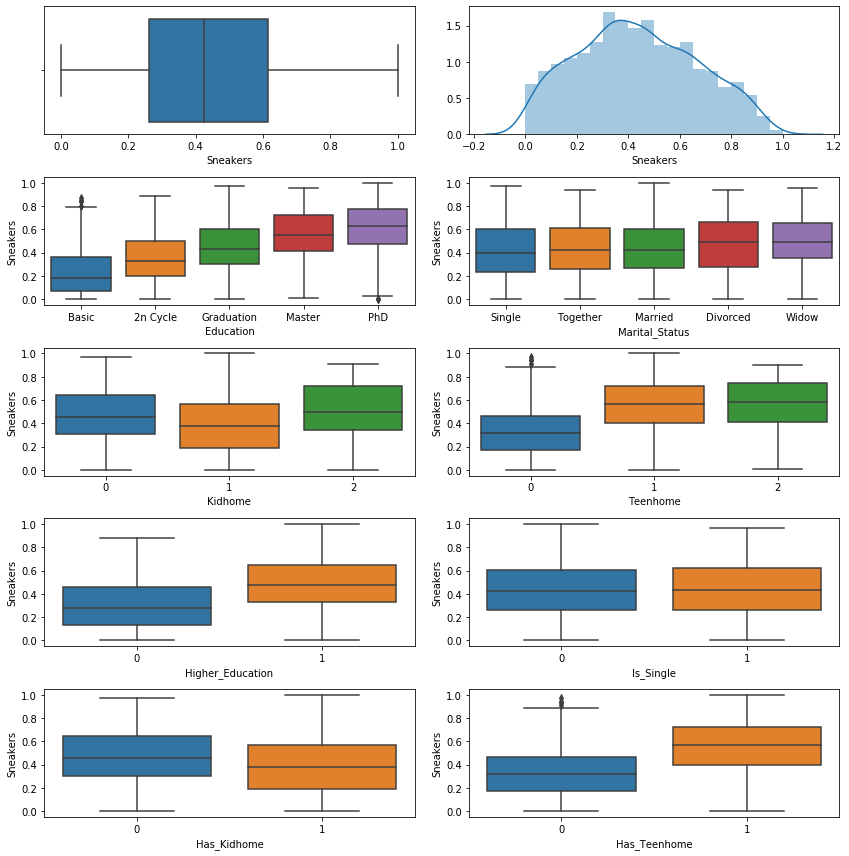

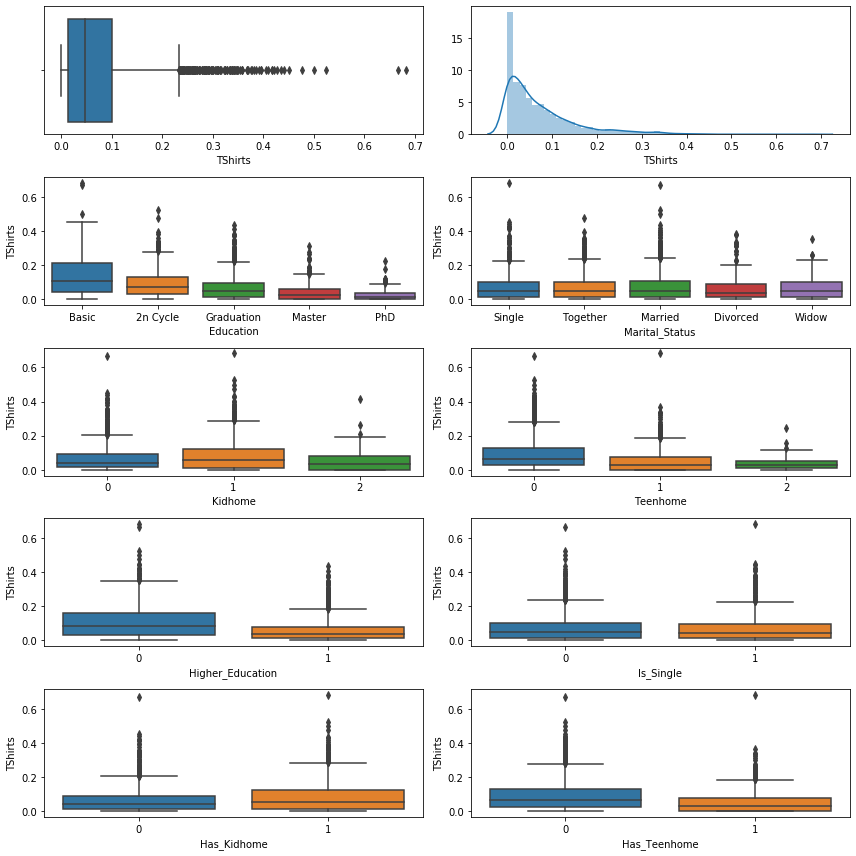

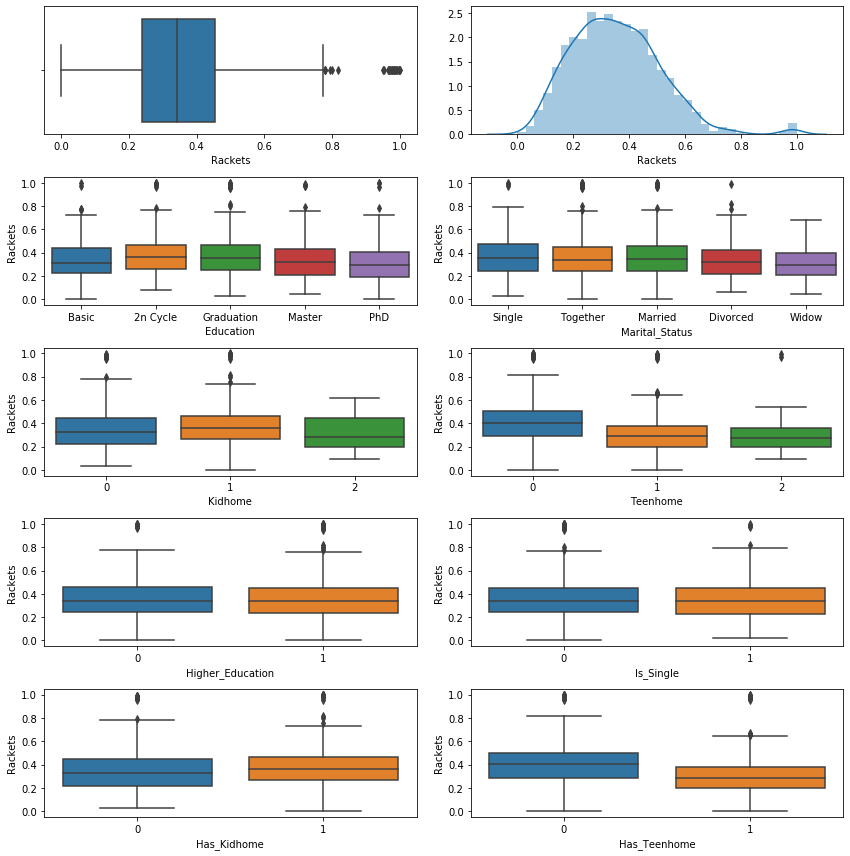

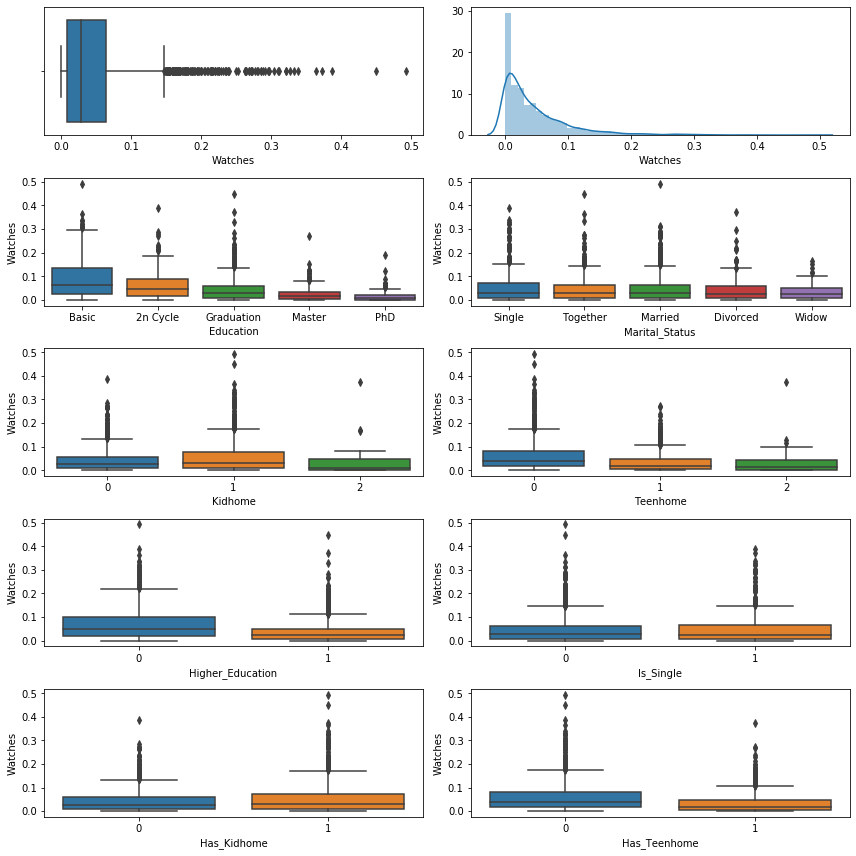

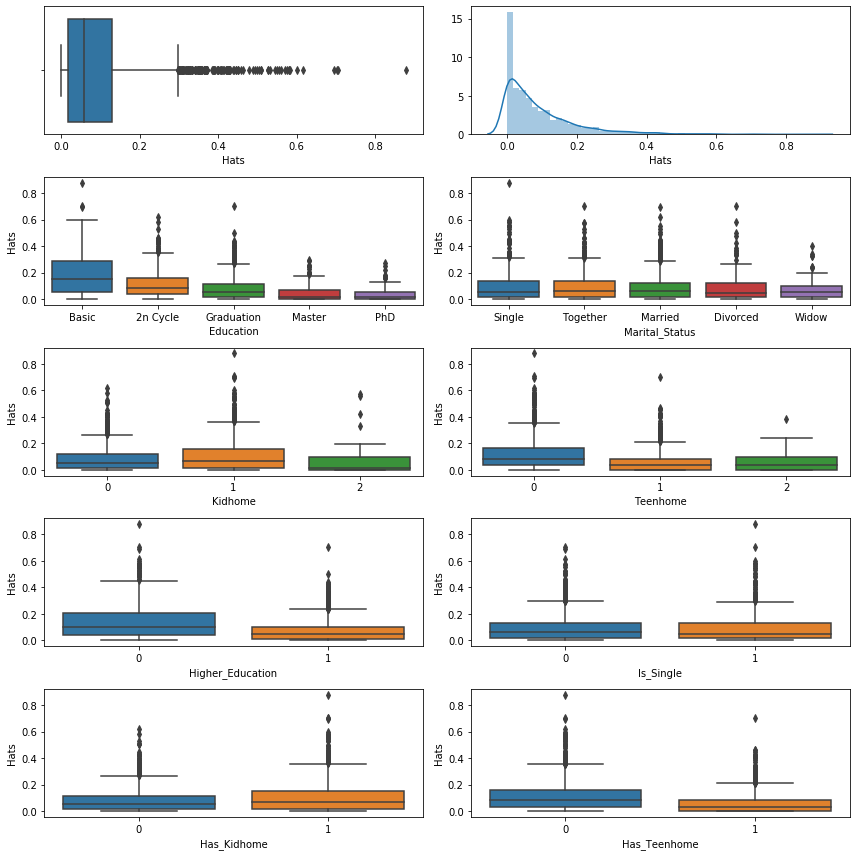

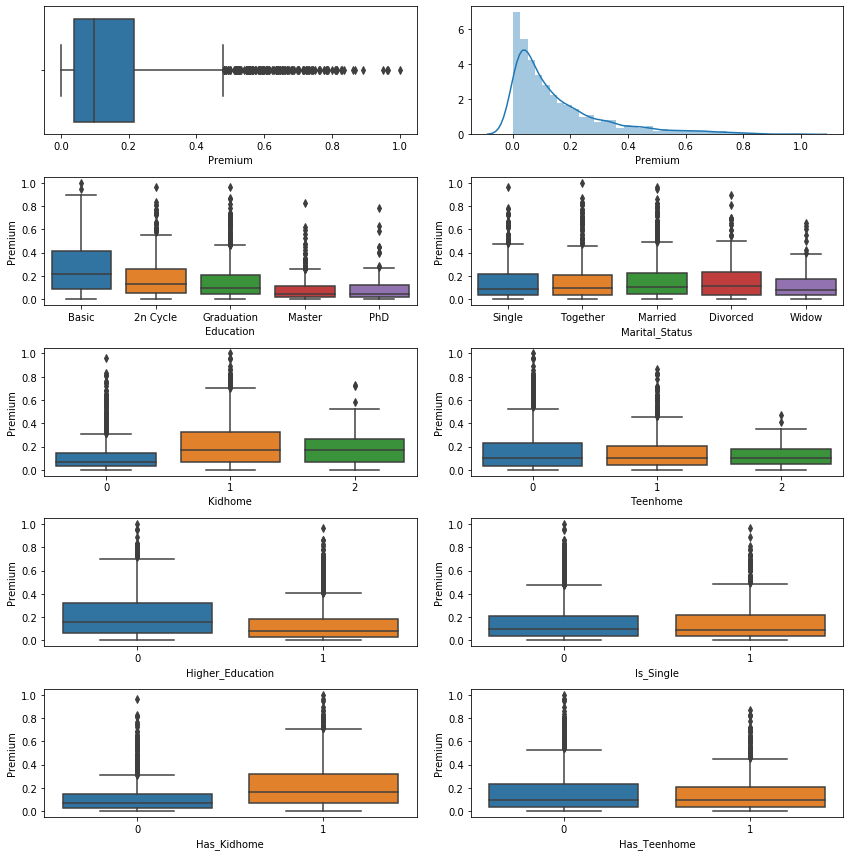

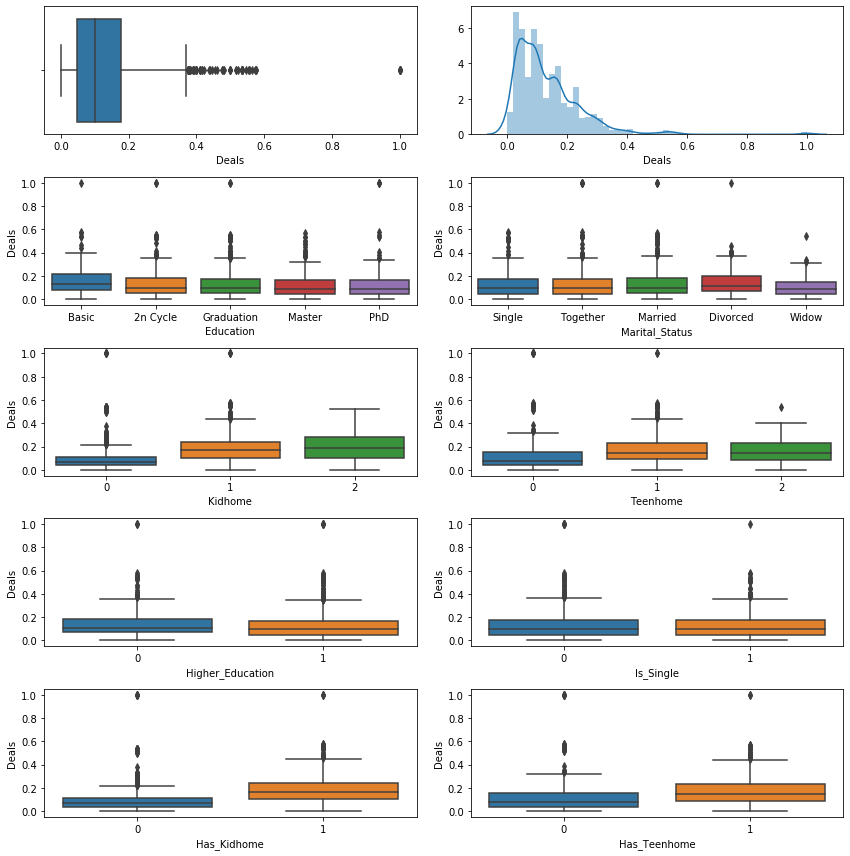

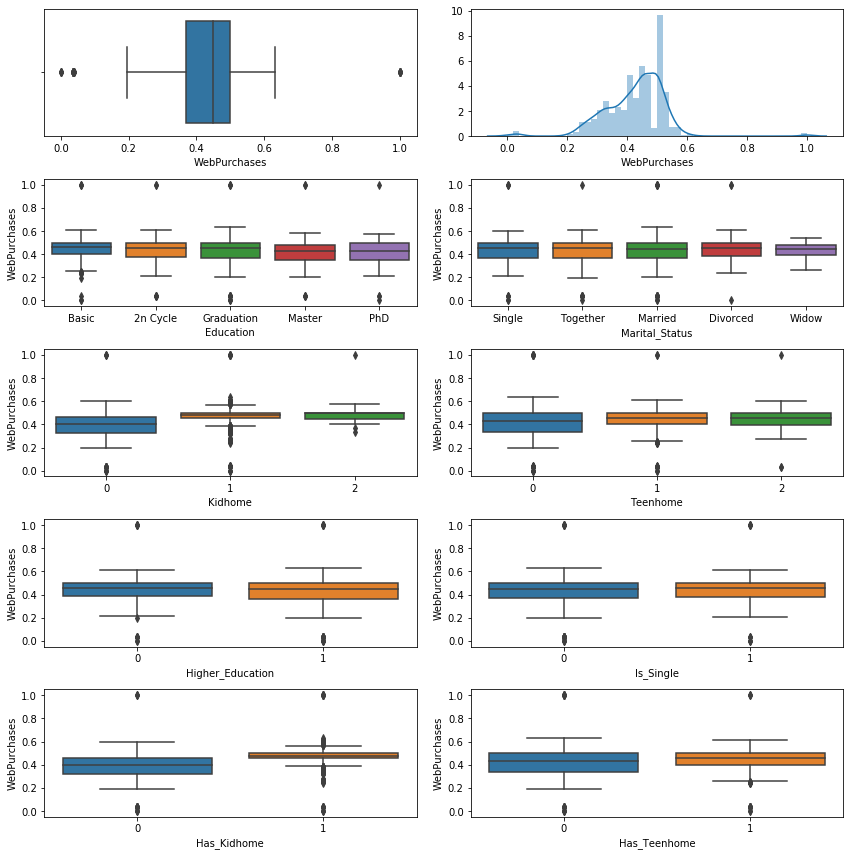

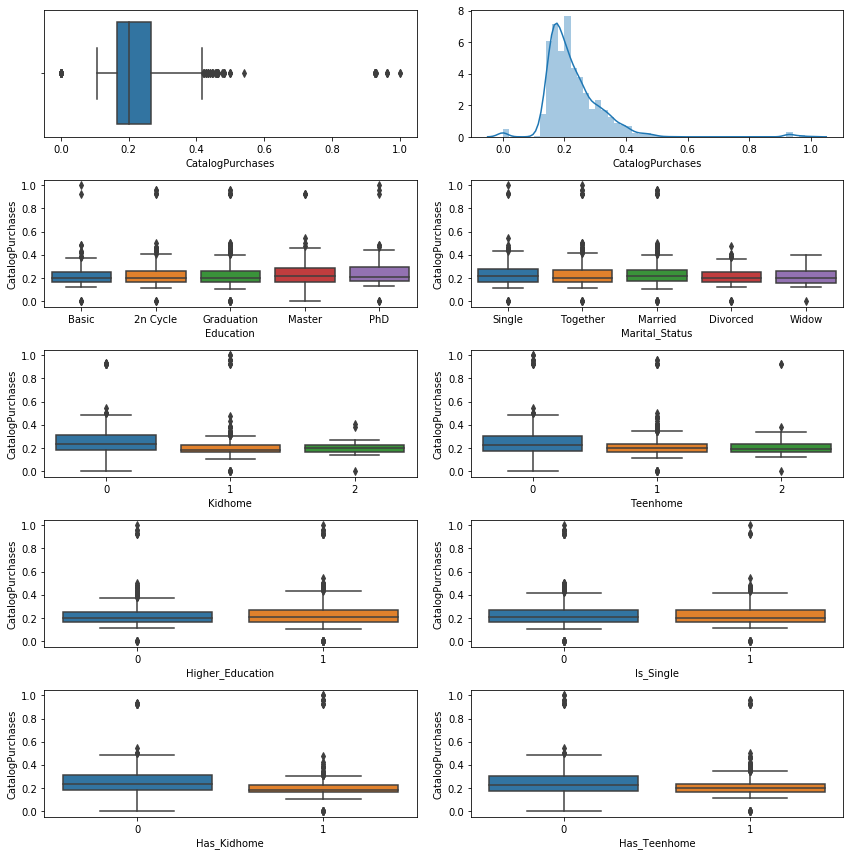

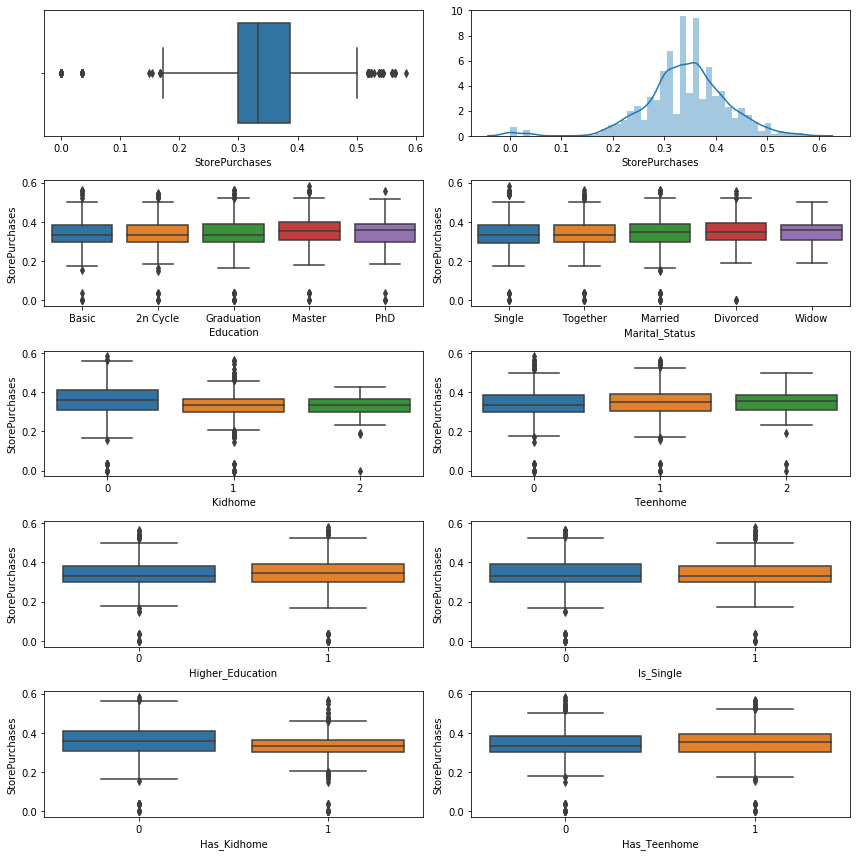

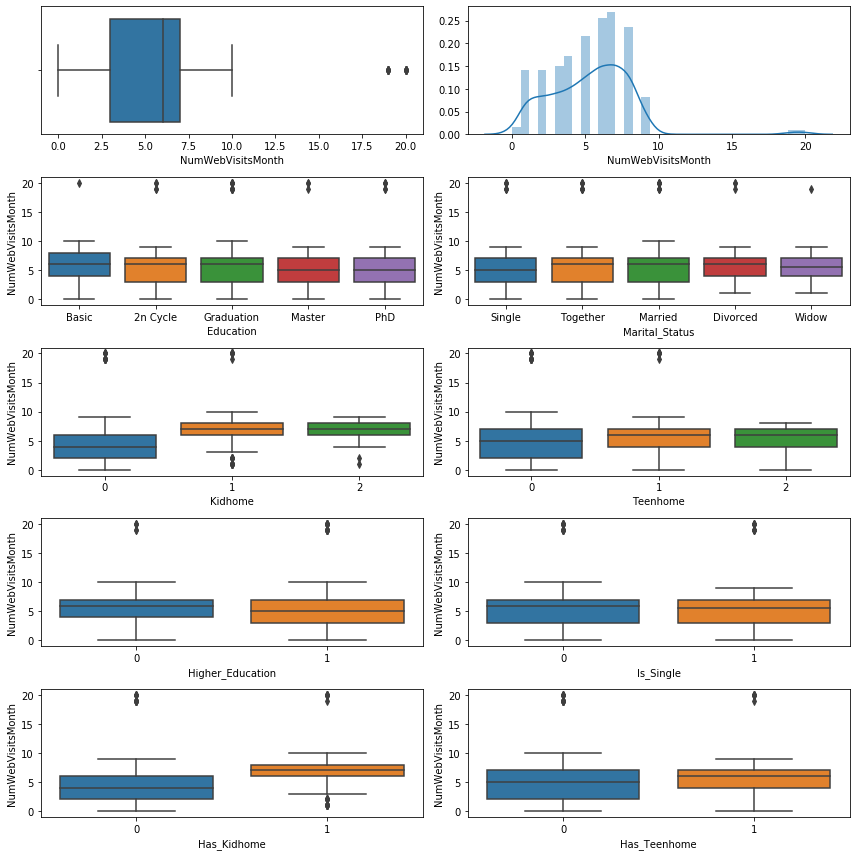

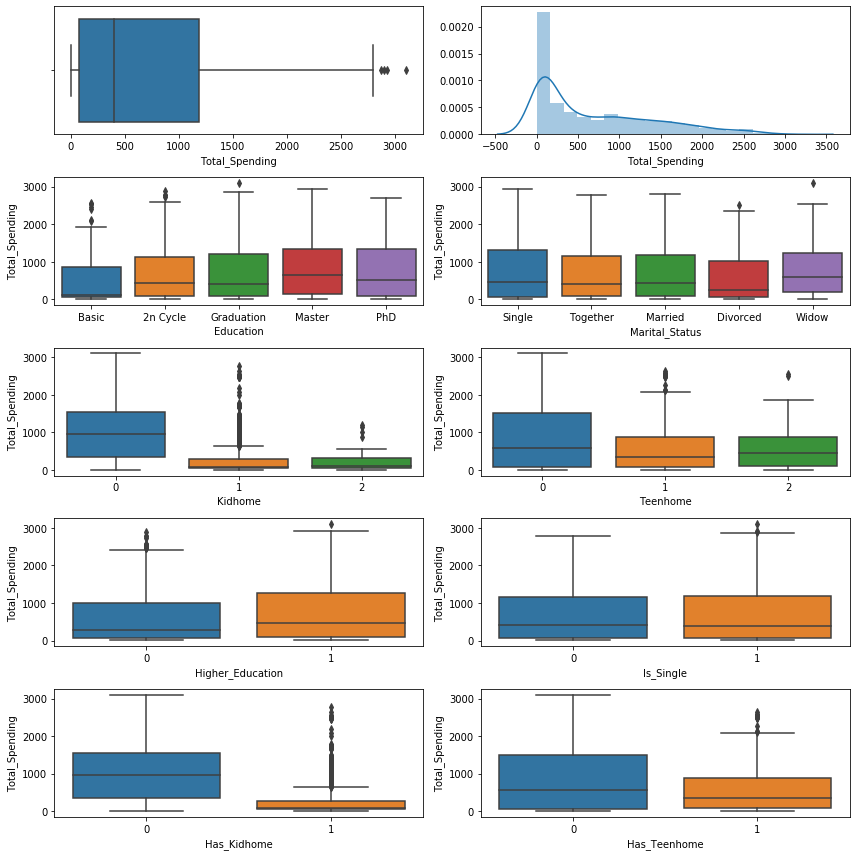

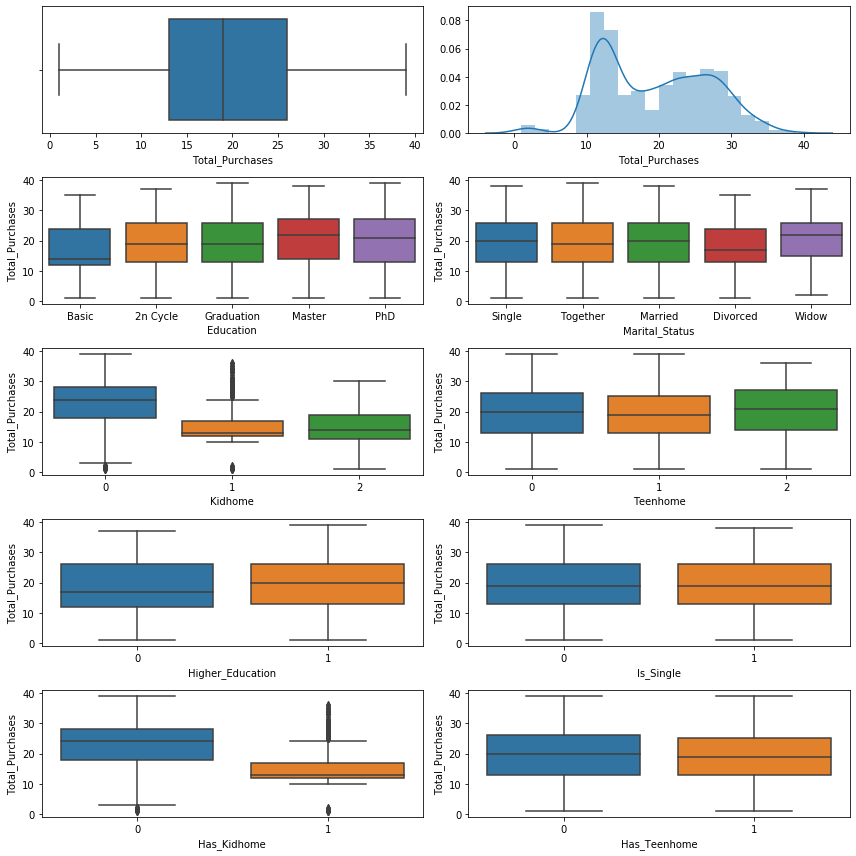

In [21]:
variables = ['Income'
             ,'Recency'
             ,'Sneakers'
             ,'TShirts'
             ,'Rackets'
             ,'Watches'
             ,'Hats'
             ,'Premium'
             ,'Deals'
             ,'WebPurchases'
             ,'CatalogPurchases'
             ,'StorePurchases'
             ,'NumWebVisitsMonth'
             ,'Total_Spending'
             ,'Total_Purchases'
             ]

for var in variables:
    fig, ax = plt.subplots(5, 2, figsize=(12,12))

    sns.boxplot(x=var, data = data, ax = ax[0][0])
    sns.distplot(data[var], ax = ax[0][1])
    sns.boxplot(x=data['Education'], y=data[var], order=['Basic','2n Cycle','Graduation','Master','PhD'], ax = ax[1][0])
    sns.boxplot(x=data['Marital_Status'], y=data[var], order=['Single','Together','Married','Divorced','Widow'], ax = ax[1][1])
    sns.boxplot(x=data['Kidhome'], y=data[var], ax = ax[2][0])
    sns.boxplot(x=data['Teenhome'], y=data[var], ax = ax[2][1])
    
    sns.boxplot(x=data['Higher_Education'], y=data[var], ax = ax[3][0])
    sns.boxplot(x=data['Is_Single'], y=data[var], ax = ax[3][1])
    sns.boxplot(x=data['Has_Kidhome'], y=data[var], ax = ax[4][0])
    sns.boxplot(x=data['Has_Teenhome'], y=data[var], ax = ax[4][1])

    plt.tight_layout()
    plt.show()

Histogram of purchases variables: `NumDealsPurchases`,`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.

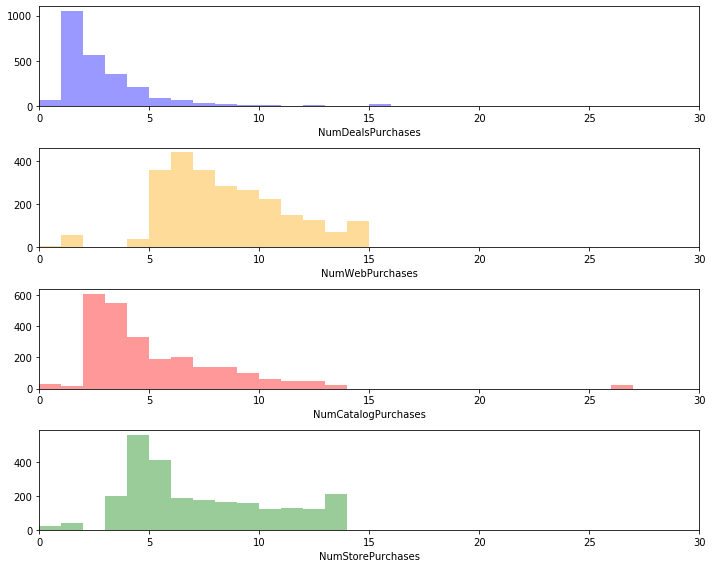

In [22]:
columns = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
colors = ['blue','orange', 'red', 'green']
bin_count = [16,15,27,14]

fig, axs = plt.subplots(4, figsize=(10,8))

for i, column in enumerate(columns):
    sns.distplot(data[column], kde=False, label = column, ax = axs[i], color = colors[i], bins = bin_count[i])
    axs[i].set_xlim(0, 30)

plt.tight_layout()

<a id='Outliers'></a>
### 1.5 Outliers

Considering the exploratory data analysis, we identified the following variables containing potential outliers:
- Income
- T-Shirt
- Rackets
- Hats
- Watches
- Premium
- Deals
- WebPurchases
- CatalogPurchases
- NumWebVisits

Despite this analysis, we only handled outliers in the `Income` variable, as altering the other variables would result in a decrease in cluster performance.

#### Income

In [23]:
len(data[data['Income'] > 175000])

28

[0.01840905]
-473.06800577231184


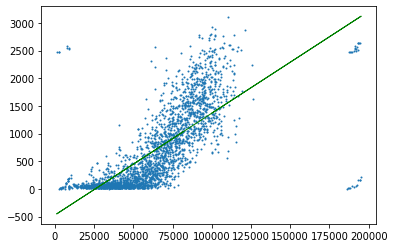

In [24]:
regr = linear_model.LinearRegression()

x = data['Income'].values.reshape(-1, 1)
regr.fit(x, data['Total_Spending'])
y_pred = regr.predict(x)

plt.scatter(x, data['Total_Spending'], s =1)
plt.plot(x, y_pred, linewidth = 1, c = 'g')
print(regr.coef_)
print(regr.intercept_)

[0.02198449]
-677.2306015912469


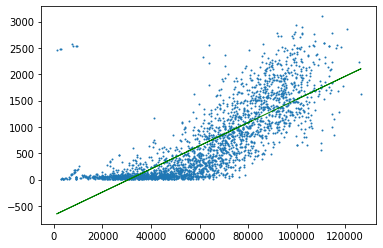

In [25]:
regr = linear_model.LinearRegression()

subset = data[data['Income'] < 175000]
x = subset['Income'].values.reshape(-1, 1)

regr.fit(x, subset['Total_Spending'])
y_pred = regr.predict(x)
plt.scatter(x, subset['Total_Spending'], s =1)
plt.plot(x, y_pred, linewidth = 1, c = 'g')
print(regr.coef_)
print(regr.intercept_)

The regression suggests a high influence of outliers hence, we have to deal with them.

In [26]:
# We opt for removing the 26 cases given their small number of observations and pottential high impact
data = data[data['Income'] < 175000]

Graphical analysis between `Income` (without outliers) and categorical variables.

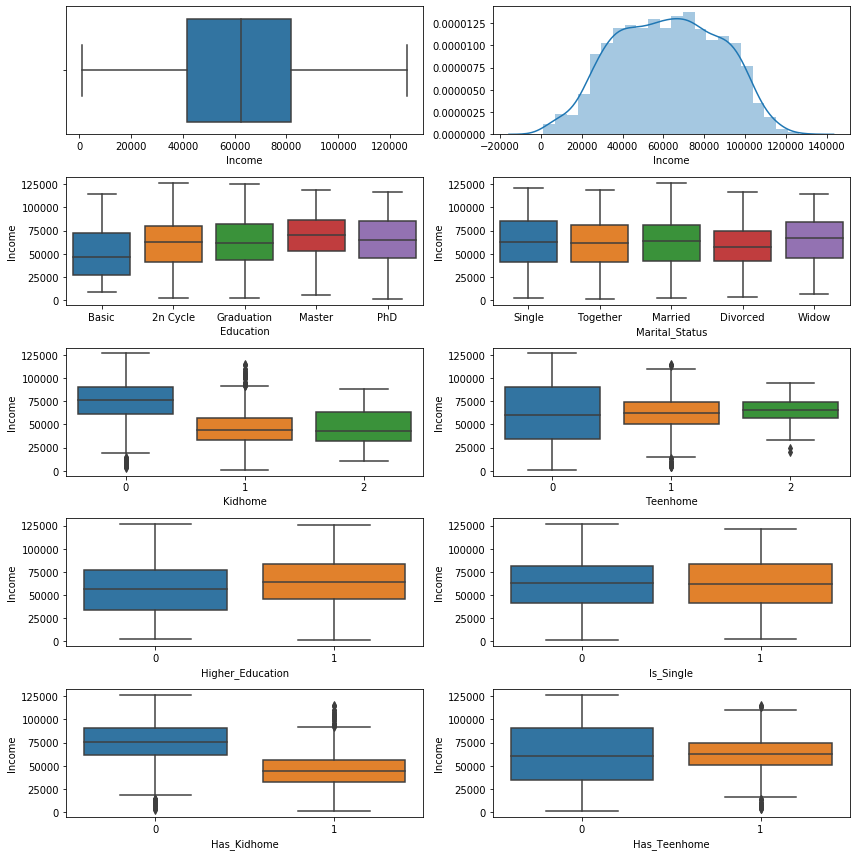

In [27]:
variables = ['Income']

for var in variables:
    fig, ax = plt.subplots(5, 2, figsize=(12,12))

    sns.boxplot(x=var, data = data, ax = ax[0][0])
    sns.distplot(data[var], ax = ax[0][1])
    sns.boxplot(x=data['Education'], y=data[var], order=['Basic','2n Cycle','Graduation','Master','PhD'], ax = ax[1][0])
    sns.boxplot(x=data['Marital_Status'], y=data[var], order=['Single','Together','Married','Divorced','Widow'], ax = ax[1][1])
    sns.boxplot(x=data['Kidhome'], y=data[var], ax = ax[2][0])
    sns.boxplot(x=data['Teenhome'], y=data[var], ax = ax[2][1])
    
    sns.boxplot(x=data['Higher_Education'], y=data[var], ax = ax[3][0])
    sns.boxplot(x=data['Is_Single'], y=data[var], ax = ax[3][1])
    sns.boxplot(x=data['Has_Kidhome'], y=data[var], ax = ax[4][0])
    sns.boxplot(x=data['Has_Teenhome'], y=data[var], ax = ax[4][1])

    plt.tight_layout()
    plt.show()

<a id='Correlations'></a>
### 1.6 Correlations

In this section we study the correlation between the variables of our transformed dataset.

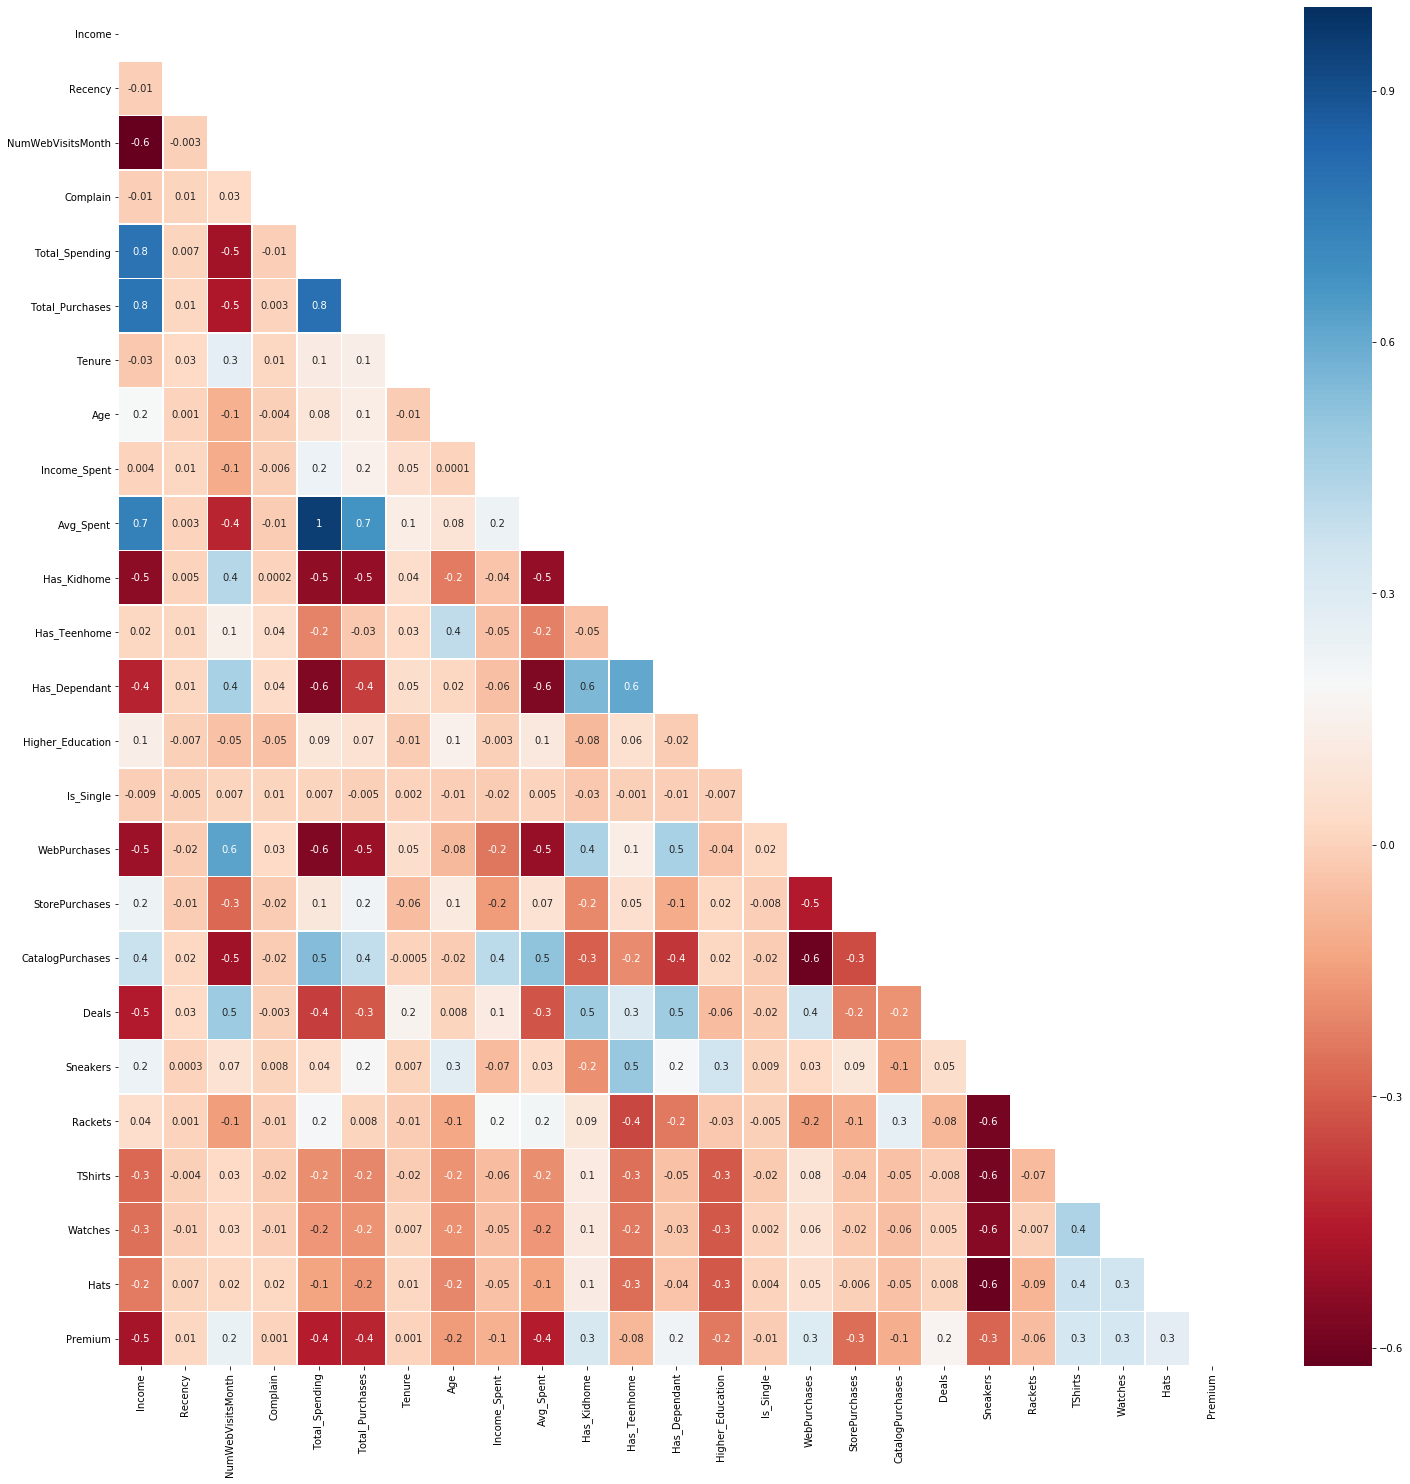

In [28]:
data_corr=data.drop(['Year_Birth','Kidhome','Teenhome',
                     'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','DepVar',
                     'MntSneakers','MntRackets','MntTShirts','MntWatches','MntHats','MntPremium_Brand',
                     'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'], axis=1)

plt.figure(figsize = (25,25))
mask = np.tril(data_corr.corr()).T
coor_plot=sns.heatmap(data_corr.corr(), annot=True, fmt='.1g', linewidths=.5,mask=mask, cmap='RdBu')

b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t) 
plt.show()

Notes:
No strong correlations (>.5) have been identified, apart from the expected aggregators:
- A linear relationship between Total_Spending, Total_Purchases, Avg_Spent and its contituents

<a id='Normalization'></a>
### 1.7 Variables Normalization 

Models based on distances between observations (as is the case of K-means and K-medoids) suffer greatly from data with high magnitude ranges. To overcome this, we normalize the data to bring it to a lower common range.

In [29]:
data_norm = data.copy()

#Normalize Income, Recency Avg_Spent
scaler = MinMaxScaler()
data_norm[['Income', 'Recency', 'Avg_Spent', 'Age', 'Total_Purchases', 'Total_Spending', 'NumWebVisitsMonth','Tenure']] =  \
    scaler.fit_transform(data_norm[['Income', 'Recency', 'Avg_Spent', 'Age', 'Total_Purchases', 'Total_Spending', 'NumWebVisitsMonth', 'Tenure']])

<a id='Customer'></a>
## 2. Customer Value Segmentation

#### Select the base variables for each analysis type

We began by selecting features we thought could be important for our model.

In [30]:
customer_base = data_norm[[
                    'Income'
                     ,'Recency'
                     ,'WebPurchases'
                     ,'CatalogPurchases'
                     ,'StorePurchases'
                     ,'NumWebVisitsMonth' #Likely to not be meaningful
                     ,'Total_Spending'
                     ,'Total_Purchases'
                     ,'Deals'
                     ,'Premium'
                     ,'Complain' #Likely to not be meaningful
                     ,'Age'
                     ,'Tenure'
                     ,'Income_Spent' #Likely to not be meaningful
                     ,'Avg_Spent' #Likely to not be meaningful
                     ,'Has_Kidhome' #Likely to not be meaningful
                     ,'Has_Teenhome' #Likely to not be meaningful
                     ,'Higher_Education' #Likely to not be meaningful
                     ,'Has_Dependant'
                     ]].copy()#### Select the base variables for each analysis type: customer and product analysis

<a id='KMeans'></a>
### 2.1 <u> K-means</u>

The K-means is an algorithm to partition a dataset into k distinct, non-overlapping clusters by minimizing distances between the clusters centroids and its observations, using distances heuristics such as Manhattan. One of its shortcommings is the fact that it isn't robust to outliers.

We applied K-means taking into account the perspective of customer value, creating a new dataframe, named `customer_kmeans` where we selected features relevant to customer segmentation.

In [31]:
customer_kmeans = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

####  Identify the right number of clusters

We identified the number of clusters based on the results of the K-means inertia graph (elbow method).

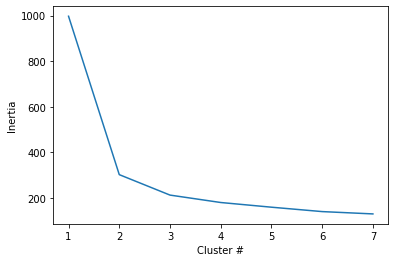

In [32]:
k_rng = range(1, 8)
k_inertia = []

for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(customer_kmeans)
    k_inertia.append(k_means.inertia_)
    
g = sns.lineplot(k_rng, k_inertia)

g.set(xlabel='Cluster #', ylabel='Inertia')
g.set_xticks(k_rng)
plt.show(g)

The optimal number of cluster seems to be either 2 or 3, we will compute both and evaluate the results.

#### 2 Clusters

In [33]:
k_mean2 = KMeans(n_clusters =2).fit(customer_kmeans)

customer_kmeans['labels2clus'] = k_mean2.labels_
customer_kmeans.groupby(['labels2clus']).describe().transpose()

labels2clus                        0            1
Income            count  1047.000000  1425.000000
                  mean      0.359429     0.578271
                  std       0.154908     0.179808
                  min       0.000000     0.013163
                  25%       0.254026     0.478706
                  50%       0.344673     0.597934
                  75%       0.442730     0.711597
                  max       0.911354     1.000000
WebPurchases      count  1047.000000  1425.000000
                  mean      0.476221     0.393547
                  std       0.071932     0.089396
                  min       0.000000     0.000000
                  25%       0.454545     0.333333
                  50%       0.478261     0.400000
                  75%       0.500000     0.461538
                  max       1.000000     1.000000
NumWebVisitsMonth count  1047.000000  1425.000000
                  mean      0.335673     0.219579
                  std       0.101023     0.139380
                  min       0.050000     0.000000
                  25%       0.300000     0.100000
                  50%       0.350000     0.200000
                  75%       0.400000     0.300000
                  max       1.000000     1.000000
Total_Spending    count  1047.000000  1425.000000
                  mean      0.079952     0.323984
                  std       0.123459     0.230138
                  min       0.000645     0.000000
                  25%       0.013875     0.116812
                  50%       0.025169     0.307519
                  75%       0.088900     0.497257
                  max       0.896418     1.000000
Deals             count  1047.000000  1425.000000
                  mean      0.191223     0.088382
                  std       0.103009     0.084884
                  min       0.000000     0.000000
                  25%       0.100000     0.038462
                  50%       0.166667     0.068966
                  75%       0.235294     0.111111
                  max       1.000000     1.000000
Premium           count  1047.000000  1425.000000
                  mean      0.223473     0.111671
                  std       0.195636     0.128651
                  min       0.000000     0.000000
                  25%       0.071986     0.029950
                  50%       0.170732     0.066406
                  75%       0.322581     0.142857
                  max       1.000000     0.962264
Has_Kidhome       count  1047.000000  1425.000000
                  mean      1.000000     0.000000
                  std       0.000000     0.000000
                  min       1.000000     0.000000
                  25%       1.000000     0.000000
                  50%       1.000000     0.000000
                  75%       1.000000     0.000000
                  max       1.000000     0.000000

#### 3 Clusters

In [34]:
customer_kmeans3 = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

In [35]:
k_mean3 = KMeans(n_clusters =3).fit(customer_kmeans3)

#scaler.inverse_transform(customer_base_selection[['Income', 'Total_Spending']])
customer_kmeans3['labels3clus'] = k_mean3.labels_
customer_kmeans3.groupby(['labels3clus']).describe().transpose()

labels3clus                       0            1           2
Income            count  773.000000  1047.000000  652.000000
                  mean     0.699763     0.359429    0.434233
                  std      0.101068     0.154908    0.142484
                  min      0.050824     0.000000    0.013163
                  25%      0.634184     0.254026    0.351350
                  50%      0.701049     0.344673    0.466273
                  75%      0.764661     0.442730    0.539647
                  max      1.000000     0.911354    0.704924
WebPurchases      count  773.000000  1047.000000  652.000000
                  mean     0.350470     0.476221    0.444618
                  std      0.076408     0.071932    0.075775
                  min      0.034483     0.000000    0.000000
                  25%      0.300000     0.454545    0.405556
                  50%      0.344828     0.478261    0.454545
                  75%      0.400000     0.500000    0.500000
                  max      0.600000     1.000000    1.000000
NumWebVisitsMonth count  773.000000  1047.000000  652.000000
                  mean     0.156016     0.335673    0.294939
                  std      0.098759     0.101023    0.142979
                  min      0.000000     0.050000    0.000000
                  25%      0.100000     0.300000    0.200000
                  50%      0.150000     0.350000    0.300000
                  75%      0.200000     0.400000    0.350000
                  max      0.450000     1.000000    1.000000
Total_Spending    count  773.000000  1047.000000  652.000000
                  mean     0.494069     0.079952    0.122334
                  std      0.161213     0.123459    0.099782
                  min      0.174895     0.000645    0.000000
                  25%      0.370442     0.013875    0.030978
                  50%      0.480478     0.025169    0.099548
                  75%      0.603743     0.088900    0.194982
                  max      1.000000     0.896418    0.410132
Deals             count  773.000000  1047.000000  652.000000
                  mean     0.058495     0.191223    0.123815
                  std      0.053092     0.103009    0.100500
                  min      0.000000     0.000000    0.000000
                  25%      0.034483     0.100000    0.076923
                  50%      0.041667     0.166667    0.100000
                  75%      0.064516     0.235294    0.153846
                  max      0.535714     1.000000    1.000000
Premium           count  773.000000  1047.000000  652.000000
                  mean     0.060605     0.223473    0.172215
                  std      0.057098     0.195636    0.159906
                  min      0.000000     0.000000    0.000000
                  25%      0.021605     0.071986    0.057714
                  50%      0.041339     0.170732    0.126039
                  75%      0.082484     0.322581    0.239711
                  max      0.330377     1.000000    0.962264
Has_Kidhome       count  773.000000  1047.000000  652.000000
                  mean     0.000000     1.000000    0.000000
                  std      0.000000     0.000000    0.000000
                  min      0.000000     1.000000    0.000000
                  25%      0.000000     1.000000    0.000000
                  50%      0.000000     1.000000    0.000000
                  75%      0.000000     1.000000    0.000000
                  max      0.000000     1.000000    0.000000

#### Silhouette Metric

Silhouette analysis can be used to study the distance between the resulting clusters. This measure has a range of [-1, 1]. Silhouette coefficients near 1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

$ s=\frac{b-a}{max(a,b)}$

Where (a) is mean intra-cluster distance and (b) the mean nearest-cluster distance.


In [36]:
#Silhouette Coefficient Kmeans2
print("Client View:")
print("\nSilhouette Coefficient K-means (2 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmeans, customer_kmeans["labels2clus"]))

#Silhouette Coefficient Kmeans3
print("Silhouette Coefficient K-means (3 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmeans3, customer_kmeans3["labels3clus"]))

Client View:

Silhouette Coefficient K-means (2 clusters): 0.7172
Silhouette Coefficient K-means (3 clusters): 0.7581


Based on these results we have chosen K-means with 3 clusters. Since the data seems to be better separated by analyzing their feature's mean.

#### Data Visualization K-means with 3 clusters

In [37]:
cluster0_kmean = customer_kmeans3[customer_kmeans3.labels3clus==0]
cluster1_kmean = customer_kmeans3[customer_kmeans3.labels3clus==1]
cluster2_kmean = customer_kmeans3[customer_kmeans3.labels3clus==2]

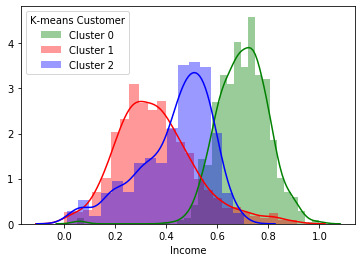

In [38]:
Filtro="Income"
sns.distplot(cluster0_kmean[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_kmean[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_kmean[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-means Customer")

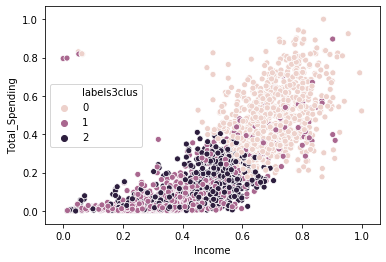

In [39]:
sns.scatterplot(data=customer_kmeans3,x='Income',y='Total_Spending',hue='labels3clus')

In [40]:
centroids3 = k_mean3.cluster_centers_

In [41]:
centroid_0_Income = centroids3[0,0]
centroid_1_Income = centroids3[1,0]
centroid_2_Income = centroids3[2,0]
centroid_0_Total_Spending = centroids3[0,3]
centroid_1_Total_Spending = centroids3[1,3]
centroid_2_Total_Spending = centroids3[2,3]

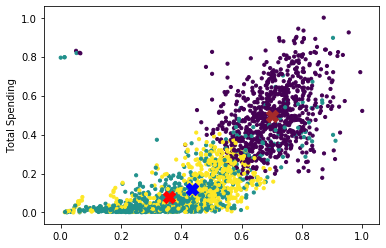

In [42]:
plt.scatter(customer_kmeans3.Income, customer_kmeans3.Total_Spending, c=customer_kmeans3.labels3clus, s=10)
plt.scatter(centroid_0_Income, centroid_0_Total_Spending, marker='X', s=150, color='brown')
plt.scatter(centroid_1_Income, centroid_1_Total_Spending, marker='X', s=150, color='red')
plt.scatter(centroid_2_Income, centroid_2_Total_Spending, marker='X', s=150, color='blue')
plt.ylabel('Total Spending')
plt.show()

<a id='DBSCAN'></a>
### 2.2 <u>DBSCAN</u>

The DBSCAN is a density-based algorithm. This clustering algorithm can discover arbitrarely shaped clusters, is robust to outliers and can find clusters in close proximity to other clusters. However is sensitive to its hypermerameters and not suitable for high demensional data of clusters of varying densities.

We applied DBSCAN taking into account the perspective of customer value, creating a new dataframe, named `customer_DBSCAN` where we selected features relevant to customer segmentation.

In [43]:
customer_DBSCAN = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

In [44]:
cl_DBSCAN = DBSCAN(eps=1, min_samples = 5).fit(customer_DBSCAN)
customer_DBSCAN['labels'] = cl_DBSCAN.labels_
customer_DBSCAN.groupby(['labels']).describe().transpose()

labels                             0            1
Income            count  1425.000000  1047.000000
                  mean      0.578271     0.359429
                  std       0.179808     0.154908
                  min       0.013163     0.000000
                  25%       0.478706     0.254026
                  50%       0.597934     0.344673
                  75%       0.711597     0.442730
                  max       1.000000     0.911354
WebPurchases      count  1425.000000  1047.000000
                  mean      0.393547     0.476221
                  std       0.089396     0.071932
                  min       0.000000     0.000000
                  25%       0.333333     0.454545
                  50%       0.400000     0.478261
                  75%       0.461538     0.500000
                  max       1.000000     1.000000
NumWebVisitsMonth count  1425.000000  1047.000000
                  mean      0.219579     0.335673
                  std       0.139380     0.101023
                  min       0.000000     0.050000
                  25%       0.100000     0.300000
                  50%       0.200000     0.350000
                  75%       0.300000     0.400000
                  max       1.000000     1.000000
Total_Spending    count  1425.000000  1047.000000
                  mean      0.323984     0.079952
                  std       0.230138     0.123459
                  min       0.000000     0.000645
                  25%       0.116812     0.013875
                  50%       0.307519     0.025169
                  75%       0.497257     0.088900
                  max       1.000000     0.896418
Deals             count  1425.000000  1047.000000
                  mean      0.088382     0.191223
                  std       0.084884     0.103009
                  min       0.000000     0.000000
                  25%       0.038462     0.100000
                  50%       0.068966     0.166667
                  75%       0.111111     0.235294
                  max       1.000000     1.000000
Premium           count  1425.000000  1047.000000
                  mean      0.111671     0.223473
                  std       0.128651     0.195636
                  min       0.000000     0.000000
                  25%       0.029950     0.071986
                  50%       0.066406     0.170732
                  75%       0.142857     0.322581
                  max       0.962264     1.000000
Has_Kidhome       count  1425.000000  1047.000000
                  mean      0.000000     1.000000
                  std       0.000000     0.000000
                  min       0.000000     1.000000
                  25%       0.000000     1.000000
                  50%       0.000000     1.000000
                  75%       0.000000     1.000000
                  max       0.000000     1.000000

#### Silhouette Metric

In [45]:
#Silhouette Coefficient Customer Segmentation
print("Silhouette Coefficient DBSCAN: %0.3f"
      % metrics.silhouette_score(customer_DBSCAN, customer_DBSCAN["labels"]))

Silhouette Coefficient DBSCAN: 0.717


#### Data Visualization

In [46]:
cluster0_DBSCAN = customer_DBSCAN[customer_DBSCAN.labels==0]
cluster1_DBSCAN = customer_DBSCAN[customer_DBSCAN.labels==1]

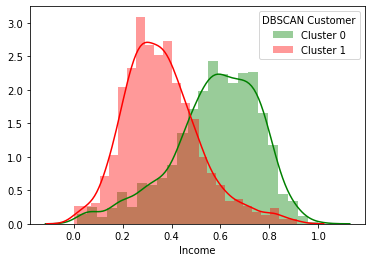

In [47]:
Filtro="Income"
sns.distplot(cluster0_DBSCAN[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_DBSCAN[Filtro],color='red',label='Cluster 1', kde = True)
legend = plt.legend(title="DBSCAN Customer")

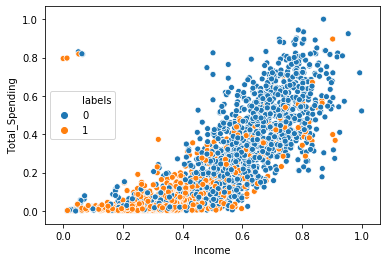

In [48]:
sns.scatterplot(data=customer_DBSCAN,x='Income',y='Total_Spending',hue='labels')

<a id='Hierarchical'></a>
### 2.3 <u>Hierarchical Clustering</u>

The Hierarchical Clustering is an algorithm using an agglomerative hierarchical approach that build nested clusters in a successive manner. One of its advantages is the fact that does not require us to commit to a particular k.

We applied Hierarchical Clustering taking into account the perspective of customer value, creating a new dataframe, named `customer_HC` where we selected features relevant to customer segmentation.

In [49]:
customer_HC = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

In [50]:
cl_HC = AgglomerativeClustering(n_clusters=3).fit(customer_HC)

customer_HC['labels'] = cl_HC.labels_
customer_HC.groupby(['labels']).describe().transpose()

labels                             0           1           2
Income            count  1051.000000  954.000000  467.000000
                  mean      0.358293    0.668822    0.397721
                  std       0.155703    0.111080    0.147687
                  min       0.000000    0.321720    0.013163
                  25%       0.251072    0.584948    0.299593
                  50%       0.344091    0.672404    0.422293
                  75%       0.442443    0.748894    0.509025
                  max       0.911354    1.000000    0.704924
WebPurchases      count  1051.000000  954.000000  467.000000
                  mean      0.474543    0.363754    0.457475
                  std       0.076759    0.077866    0.070765
                  min       0.000000    0.193548    0.000000
                  25%       0.454545    0.307692    0.416667
                  50%       0.478261    0.357143    0.461538
                  75%       0.500000    0.413793    0.500000
                  max       1.000000    0.600000    1.000000
NumWebVisitsMonth count  1051.000000  954.000000  467.000000
                  mean      0.334396    0.183071    0.296039
                  std       0.102929    0.111952    0.157265
                  min       0.000000    0.000000    0.050000
                  25%       0.300000    0.100000    0.200000
                  50%       0.350000    0.150000    0.300000
                  75%       0.400000    0.250000    0.350000
                  max       1.000000    0.450000    1.000000
Total_Spending    count  1051.000000  954.000000  467.000000
                  mean      0.082053    0.445813    0.072472
                  std       0.129438    0.175224    0.059403
                  min       0.000645    0.071959    0.000000
                  25%       0.013875    0.304856    0.020652
                  50%       0.025492    0.426589    0.056470
                  75%       0.090029    0.564456    0.116651
                  max       0.896418    1.000000    0.303969
Deals             count  1051.000000  954.000000  467.000000
                  mean      0.192516    0.068747    0.124700
                  std       0.104924    0.053772    0.110954
                  min       0.000000    0.000000    0.000000
                  25%       0.100000    0.035714    0.076923
                  50%       0.166667    0.043478    0.100000
                  75%       0.238095    0.088235    0.142857
                  max       1.000000    0.379310    1.000000
Premium           count  1051.000000  954.000000  467.000000
                  mean      0.222663    0.069433    0.198823
                  std       0.195704    0.065627    0.174401
                  min       0.000000    0.000000    0.000000
                  25%       0.070328    0.022970    0.066798
                  50%       0.170213    0.047279    0.142857
                  75%       0.322581    0.096533    0.278889
                  max       1.000000    0.367442    0.962264
Has_Kidhome       count  1051.000000  954.000000  467.000000
                  mean      0.996194    0.000000    0.000000
                  std       0.061604    0.000000    0.000000
                  min       0.000000    0.000000    0.000000
                  25%       1.000000    0.000000    0.000000
                  50%       1.000000    0.000000    0.000000
                  75%       1.000000    0.000000    0.000000
                  max       1.000000    0.000000    0.000000

#### Silhouette Metric

In [51]:
#Silhouette Coefficient Customer Segmentation
print("Silhouette Coefficient #### Silhouette Metric: %0.3f"
      % metrics.silhouette_score(customer_HC, customer_HC["labels"]))

Silhouette Coefficient #### Silhouette Metric: 0.717


#### Data Visualization

In [52]:
cluster0_HC = customer_HC[customer_HC.labels==0]
cluster1_HC = customer_HC[customer_HC.labels==1]
cluster2_HC = customer_HC[customer_HC.labels==2]

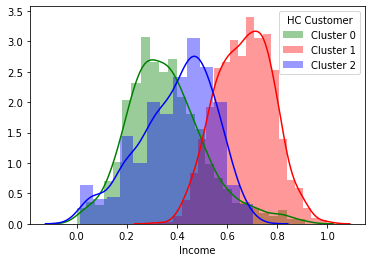

In [53]:
Filtro="Income"

sns.distplot(cluster0_HC[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_HC[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_HC[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="HC Customer")

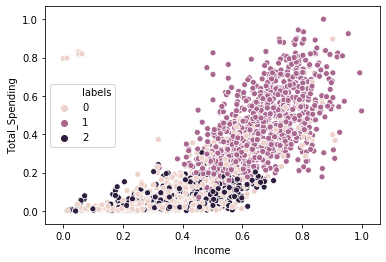

In [54]:
sns.scatterplot(data=customer_HC,x='Income',y='Total_Spending',hue='labels')

<a id='KMedoids'></a>
### 2.4 <u>K-medoids</u>

The K-medoids algorithm is a clustering approach related to K-means clustering for partitioning a dataset into k groups or clusters. Unlike K-means, in K-medoids each cluster is represented by one of the data points in the cluster. These points are named cluster medoids.This algorithm is a robust alternative to k-means clustering, because the algorithm is less sensitive to noise and outliers, compared to K-means.

We applied K-medoids taking into account the perspective of customer value, creating a new dataframe, named `customer_kmedoids` where we selected features relevant to customer segmentation.

In [55]:
customer_kmedoids = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

#### 2 clusters

In [56]:
cl_Kmedoids2 = KMedoids(n_clusters=2, random_state=0).fit(customer_kmedoids)
customer_kmedoids['labels2clus'] = cl_Kmedoids2.labels_
customer_kmedoids.groupby(['labels2clus']).describe().transpose()

labels2clus                        0            1
Income            count  1425.000000  1047.000000
                  mean      0.578271     0.359429
                  std       0.179808     0.154908
                  min       0.013163     0.000000
                  25%       0.478706     0.254026
                  50%       0.597934     0.344673
                  75%       0.711597     0.442730
                  max       1.000000     0.911354
WebPurchases      count  1425.000000  1047.000000
                  mean      0.393547     0.476221
                  std       0.089396     0.071932
                  min       0.000000     0.000000
                  25%       0.333333     0.454545
                  50%       0.400000     0.478261
                  75%       0.461538     0.500000
                  max       1.000000     1.000000
NumWebVisitsMonth count  1425.000000  1047.000000
                  mean      0.219579     0.335673
                  std       0.139380     0.101023
                  min       0.000000     0.050000
                  25%       0.100000     0.300000
                  50%       0.200000     0.350000
                  75%       0.300000     0.400000
                  max       1.000000     1.000000
Total_Spending    count  1425.000000  1047.000000
                  mean      0.323984     0.079952
                  std       0.230138     0.123459
                  min       0.000000     0.000645
                  25%       0.116812     0.013875
                  50%       0.307519     0.025169
                  75%       0.497257     0.088900
                  max       1.000000     0.896418
Deals             count  1425.000000  1047.000000
                  mean      0.088382     0.191223
                  std       0.084884     0.103009
                  min       0.000000     0.000000
                  25%       0.038462     0.100000
                  50%       0.068966     0.166667
                  75%       0.111111     0.235294
                  max       1.000000     1.000000
Premium           count  1425.000000  1047.000000
                  mean      0.111671     0.223473
                  std       0.128651     0.195636
                  min       0.000000     0.000000
                  25%       0.029950     0.071986
                  50%       0.066406     0.170732
                  75%       0.142857     0.322581
                  max       0.962264     1.000000
Has_Kidhome       count  1425.000000  1047.000000
                  mean      0.000000     1.000000
                  std       0.000000     0.000000
                  min       0.000000     1.000000
                  25%       0.000000     1.000000
                  50%       0.000000     1.000000
                  75%       0.000000     1.000000
                  max       0.000000     1.000000

#### 3 clusters

In [57]:
customer_kmedoids3 = customer_base.drop(['Higher_Education'
                                              ,'Avg_Spent'
                                              ,'Income_Spent'
                                              ,'Tenure'
                                              ,'Complain'
                                              ,'Recency'
                                              ,'Age'
                                              #,'Deals'
                                              #,'WebPurchases'
                                              ,'CatalogPurchases'
                                              ,'StorePurchases'
                                              #,'NumWebVisitsMonth'
                                              ,'Has_Dependant'
                                              ,'Total_Purchases'
                                              ,'Has_Teenhome'
                                              ] , axis = 1)

In [58]:
cl_Kmedoids3 = KMedoids(n_clusters=3, random_state=0).fit(customer_kmedoids3)
customer_kmedoids3['labels3clus'] = cl_Kmedoids3.labels_
customer_kmedoids3.groupby(['labels3clus']).describe().transpose()

labels3clus                       0            1           2
Income            count  698.000000  1047.000000  727.000000
                  mean     0.444699     0.359429    0.706514
                  std      0.144063     0.154908    0.099334
                  min      0.013163     0.000000    0.050824
                  25%      0.360582     0.254026    0.645294
                  50%      0.477087     0.344673    0.708511
                  75%      0.552604     0.442730    0.768974
                  max      0.790229     0.911354    1.000000
WebPurchases      count  698.000000  1047.000000  727.000000
                  mean     0.439329     0.476221    0.349590
                  std      0.078069     0.071932    0.076640
                  min      0.000000     0.000000    0.034483
                  25%      0.400000     0.454545    0.296296
                  50%      0.454545     0.478261    0.344828
                  75%      0.500000     0.500000    0.400000
                  max      1.000000     1.000000    0.600000
NumWebVisitsMonth count  698.000000  1047.000000  727.000000
                  mean     0.288754     0.335673    0.153164
                  std      0.142403     0.101023    0.098072
                  min      0.000000     0.050000    0.000000
                  25%      0.200000     0.300000    0.050000
                  50%      0.300000     0.350000    0.150000
                  75%      0.350000     0.400000    0.200000
                  max      1.000000     1.000000    0.450000
Total_Spending    count  698.000000  1047.000000  727.000000
                  mean     0.132720     0.079952    0.507619
                  std      0.105302     0.123459    0.155882
                  min      0.000000     0.000645    0.178122
                  25%      0.035495     0.013875    0.386415
                  50%      0.112778     0.025169    0.493062
                  75%      0.218458     0.088900    0.611004
                  max      0.429493     0.896418    1.000000
Deals             count  698.000000  1047.000000  727.000000
                  mean     0.121665     0.191223    0.056426
                  std      0.098816     0.103009    0.051677
                  min      0.000000     0.000000    0.000000
                  25%      0.076923     0.100000    0.034483
                  50%      0.100000     0.166667    0.040000
                  75%      0.150000     0.235294    0.058824
                  max      1.000000     1.000000    0.535714
Premium           count  698.000000  1047.000000  727.000000
                  mean     0.165688     0.223473    0.059809
                  std      0.157421     0.195636    0.056332
                  min      0.000000     0.000000    0.000000
                  25%      0.053025     0.071986    0.021513
                  50%      0.120622     0.170732    0.040639
                  75%      0.227893     0.322581    0.082039
                  max      0.962264     1.000000    0.330377
Has_Kidhome       count  698.000000  1047.000000  727.000000
                  mean     0.000000     1.000000    0.000000
                  std      0.000000     0.000000    0.000000
                  min      0.000000     1.000000    0.000000
                  25%      0.000000     1.000000    0.000000
                  50%      0.000000     1.000000    0.000000
                  75%      0.000000     1.000000    0.000000
                  max      0.000000     1.000000    0.000000

#### Silhouette Metric

In [59]:
#Silhouette Coefficient Kmedoids3
print("Silhouette Coefficient K-medoids (2 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmedoids, customer_kmedoids["labels2clus"]))

#Silhouette Coefficient Kmedoids3
print("Silhouette Coefficient K-medoids (3 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmedoids3, customer_kmedoids3["labels3clus"]))

Silhouette Coefficient K-medoids (2 clusters): 0.7172
Silhouette Coefficient K-medoids (3 clusters): 0.7582


#### Data Visualization (3 clusters)

In [60]:
cluster0_Kmedoids = customer_kmedoids3[customer_kmedoids3.labels3clus==0]
cluster1_Kmedoids = customer_kmedoids3[customer_kmedoids3.labels3clus==1]
cluster2_Kmedoids = customer_kmedoids3[customer_kmedoids3.labels3clus==2]

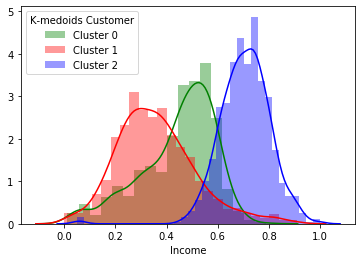

In [61]:
Filtro="Income"

sns.distplot(cluster0_Kmedoids[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_Kmedoids[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_Kmedoids[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-medoids Customer")

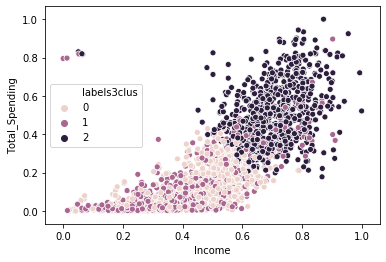

In [62]:
sns.scatterplot(data=customer_kmedoids3,x='Income',y='Total_Spending',hue='labels3clus')

#### Comparing Algorithms

In [63]:
print("Client View:")

#Silhouette Coefficient Kmeans3
print("Silhouette Coefficient K-means (3 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmeans3, customer_kmeans3["labels3clus"]))

#Silhouette Coefficient DBCSCAN
print("Silhouette Coefficient DBSCAN (2 clusters): %0.4f"
      % metrics.silhouette_score(customer_DBSCAN, customer_DBSCAN["labels"]))

#Silhouette Coefficient Agglomerative Clustering
print("Silhouette Coefficient HC (3 clusters): %0.4f"
      % metrics.silhouette_score(customer_HC, customer_HC["labels"]))

#Silhouette Coefficient Kmedoids3
print("Silhouette Coefficient K-medoids (3 clusters): %0.4f"
      % metrics.silhouette_score(customer_kmedoids3, customer_kmedoids3["labels3clus"]))


Client View:
Silhouette Coefficient K-means (3 clusters): 0.7581
Silhouette Coefficient DBSCAN (2 clusters): 0.7172
Silhouette Coefficient HC (3 clusters): 0.7173
Silhouette Coefficient K-medoids (3 clusters): 0.7582


Comparing the analysis for all algorithms tested, we concluded that K-means and K-medoids had the best results. As is known, K-medoids is less sensitive to outliers when compared to K-means, so we decided onto K-medoids.

In [98]:
customer_kmedoids3.groupby(['labels3clus']).mean().transpose()

labels3clus,0,1,2
Income,0.444699,0.359429,0.706514
WebPurchases,0.439329,0.476221,0.349590
NumWebVisitsMonth,0.288754,0.335673,0.153164
Total_Spending,0.132720,0.079952,0.507619
Deals,0.121665,0.191223,0.056426
Premium,0.165688,0.223473,0.059809
Has_Kidhome,0.000000,1.000000,0.000000


#### By checking the table of K-medoids clustering, it is possible to understand the distinct "behaviour" of the customers according to the cluster they belong to.

__Cluster0:__ This cluster is composed of 698 customers. The cluster seems to represent individuals with neutral behaviour, showcasing intermediate values in most features.

__Cluster1:__ This cluster is the biggest one, being composed of 1047 customers. The individuals in this cluster are characterized by having kids, less income and less total spending. However these customers buy more products with discount and at the same time more premium products. They are also the customers with more monthly web visits and web purchases.  

__Cluster2:__ This cluster is composed of 727 customers. The individuals in this cluster have higher income and total spending.

<a id='Product'></a>
## 3. Product Usage Segmentation

#### Select the base variables for each analysis type

In [64]:
product_base = data_norm[['Sneakers'
                      ,'TShirts'
                      ,'Rackets'
                      ,'Watches'
                      ,'Hats'
                      ,'Premium'
                    ]].copy()

<a id='PKMeans'></a>
###  3.1 <u>K-means</u> 

We applied K-means taking into account the perspective of product usage, creating a new dataframe, named `product_kmeans` where we selected features relevant to product segmentation.

In [65]:
product_kmeans= product_base.copy()

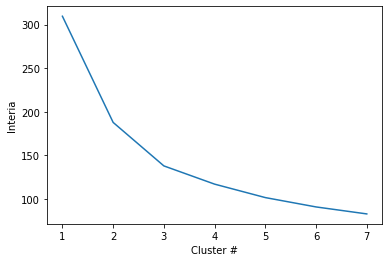

In [66]:
k_rng = range(1, 8)
k_inertia = []

for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(product_kmeans)
    k_inertia.append(k_means.inertia_)
    
g = sns.lineplot(k_rng, k_inertia)

g.set(xlabel='Cluster #', ylabel='Interia')
g.set_xticks(k_rng)
plt.show(g)

#### 2 clusters

In [67]:
# The elbow analysis suggests the optimal number of clusters is either 2 or 3
k_mean2 = KMeans(n_clusters = 2).fit(product_kmeans)
product_kmeans['labels2clus'] = k_mean2.labels_
product_kmeans.groupby(['labels2clus']).describe().transpose()

labels2clus               0            1
Sneakers count  1352.000000  1120.000000
         mean      0.266099     0.649501
         std       0.126135     0.133026
         min       0.000000     0.403994
         25%       0.166515     0.541667
         50%       0.284175     0.633382
         75%       0.367553     0.746731
         max       0.555556     1.000000
TShirts  count  1352.000000  1120.000000
         mean      0.106410     0.034346
         std       0.093941     0.040934
         min       0.000000     0.000000
         25%       0.036580     0.000000
         50%       0.080500     0.024180
         75%       0.143731     0.050198
         max       0.681818     0.333333
Rackets  count  1352.000000  1120.000000
         mean      0.426492     0.255327
         std       0.140667     0.098781
         min       0.000000     0.000000
         25%       0.333333     0.178096
         50%       0.431868     0.255036
         75%       0.517335     0.328025
         max       0.999189     0.521739
Watches  count  1352.000000  1120.000000
         mean      0.066693     0.021495
         std       0.063655     0.027406
         min       0.000000     0.000000
         25%       0.021973     0.000000
         50%       0.050000     0.014201
         75%       0.090909     0.029660
         max       0.492754     0.235294
Hats     count  1352.000000  1120.000000
         mean      0.134306     0.039330
         std       0.118775     0.046568
         min       0.000000     0.000000
         25%       0.047686     0.000000
         50%       0.105796     0.019200
         75%       0.186047     0.054662
         max       0.878049     0.270852
Premium  count  1352.000000  1120.000000
         mean      0.195146     0.115419
         std       0.193228     0.122569
         min       0.000000     0.000000
         25%       0.050186     0.032344
         50%       0.128877     0.069237
         75%       0.274445     0.158330
         max       1.000000     0.828571

#### 3 clusters

In [68]:
product_kmeans3=product_base.copy()

In [69]:
k_mean3 = KMeans(n_clusters = 3).fit(product_kmeans3)
product_kmeans3['labels3clus'] = k_mean3.labels_
product_kmeans3.groupby(['labels3clus']).describe().transpose()


labels3clus               0           1           2
Sneakers count  1136.000000  943.000000  393.000000
         mean      0.333919    0.680880    0.167444
         std       0.113142    0.120943    0.127156
         min       0.000404    0.416667    0.000000
         25%       0.256936    0.582929    0.068966
         50%       0.348978    0.664474    0.134111
         75%       0.424079    0.774772    0.241935
         max       0.550000    1.000000    0.588235
TShirts  count  1136.000000  943.000000  393.000000
         mean      0.073537    0.031202    0.176518
         std       0.061722    0.038697    0.117222
         min       0.000000    0.000000    0.000000
         25%       0.027659    0.000000    0.087591
         50%       0.060000    0.014741    0.162791
         75%       0.101242    0.043521    0.254545
         max       0.346570    0.333333    0.681818
Rackets  count  1136.000000  943.000000  393.000000
         mean      0.453507    0.233275    0.324227
         std       0.121521    0.086797    0.128400
         min       0.119134    0.000000    0.000000
         25%       0.375236    0.167532    0.230435
         50%       0.447460    0.233735    0.314815
         75%       0.525140    0.299669    0.419355
         max       0.999189    0.454545    0.818182
Watches  count  1136.000000  943.000000  393.000000
         mean      0.047539    0.019277    0.107026
         std       0.042814    0.025882    0.083220
         min       0.000000    0.000000    0.000000
         25%       0.016695    0.000000    0.043478
         50%       0.039799    0.008772    0.091371
         75%       0.066200    0.024590    0.148148
         max       0.450000    0.235294    0.492754
Hats     count  1136.000000  943.000000  393.000000
         mean      0.091498    0.035366    0.224785
         std       0.073741    0.043864    0.152146
         min       0.000000    0.000000    0.000000
         25%       0.035665    0.000000    0.111111
         50%       0.076923    0.017668    0.206897
         75%       0.132537    0.051410    0.322581
         max       0.458015    0.270852    0.878049
Premium  count  1136.000000  943.000000  393.000000
         mean      0.099317    0.122649    0.418894
         std       0.087684    0.124433    0.202013
         min       0.000000    0.000000    0.000000
         25%       0.031485    0.033879    0.262626
         50%       0.074886    0.079470    0.406780
         75%       0.142857    0.175516    0.560976
         max       0.473684    0.828571    1.000000

#### Silhouette Metric

In [70]:
#Silhouette Coefficient Kmeans2
print("Product View:")
print("\nSilhouette Coefficient K-means (2 clusters): %0.4f"
      % metrics.silhouette_score(product_kmeans, product_kmeans["labels2clus"]))

#Silhouette Coefficient Kmeans3
print("Silhouette Coefficient K-means (3 clusters): %0.4f"
      % metrics.silhouette_score(product_kmeans3, product_kmeans3["labels3clus"]))

Product View:

Silhouette Coefficient K-means (2 clusters): 0.7037
Silhouette Coefficient K-means (3 clusters): 0.7401


With 2 clusters we can barely see any difference between the means of most variables meaning, the clusters are not very informative. In order to help deciding how many clusters we should have, we have computed the Silhouette coefficient and for this reason, we'll move onto 3. 

#### Data Visualization (3 clusters)

In [71]:
cluster0_kmean = product_kmeans3[product_kmeans3.labels3clus==0]
cluster1_kmean = product_kmeans3[product_kmeans3.labels3clus==1]
cluster2_kmean = product_kmeans3[product_kmeans3.labels3clus==2]

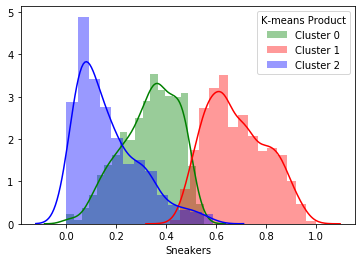

In [72]:
Filtro="Sneakers"
sns.distplot(cluster0_kmean[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_kmean[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_kmean[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-means Product")

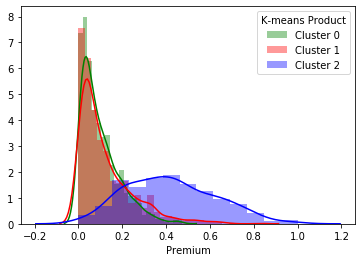

In [73]:
Filtro="Premium"
sns.distplot(cluster0_kmean[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_kmean[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_kmean[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-means Product")

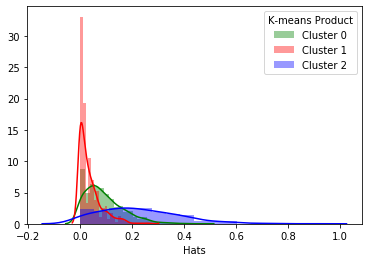

In [74]:
Filtro="Hats"
sns.distplot(cluster0_kmean[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_kmean[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_kmean[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-means Product")

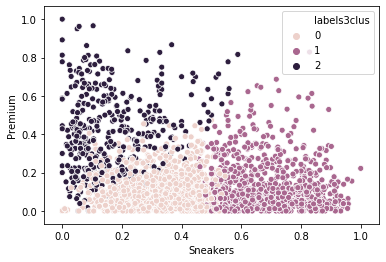

In [75]:
sns.scatterplot(data=product_kmeans3,x='Sneakers',y='Premium',hue='labels3clus')

In [76]:
centroids3 = k_mean3.cluster_centers_

In [77]:
centroid_0_Sneakers = centroids3[0,0]
centroid_1_Sneakers = centroids3[1,0]
centroid_2_Sneakers = centroids3[2,0]
centroid_0_Premium = centroids3[0,5]
centroid_1_Premium = centroids3[1,5]
centroid_2_Premium = centroids3[2,5]

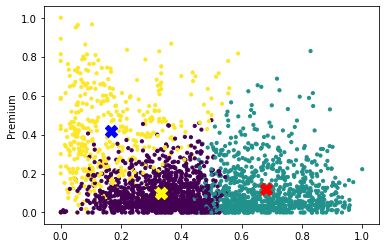

In [78]:
plt.scatter(product_kmeans3.Sneakers, product_kmeans3.Premium, c=product_kmeans3.labels3clus, s=10)
plt.scatter(centroid_0_Sneakers, centroid_0_Premium, marker='X', s=150, color='yellow')
plt.scatter(centroid_1_Sneakers, centroid_1_Premium, marker='X', s=150, color='red')
plt.scatter(centroid_2_Sneakers, centroid_2_Premium, marker='X', s=150, color='blue')
plt.ylabel('Premium')
plt.show()

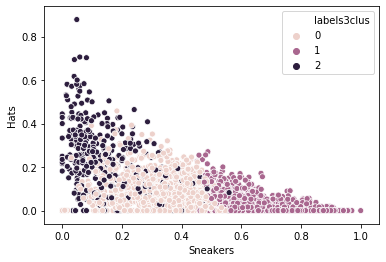

In [79]:
sns.scatterplot(data=product_kmeans3,x='Sneakers',y='Hats',hue='labels3clus')

In [80]:
centroid_0_Sneakers = centroids3[0,0]
centroid_1_Sneakers = centroids3[1,0]
centroid_2_Sneakers = centroids3[2,0]
centroid_0_Hats = centroids3[0,4]
centroid_1_Hats = centroids3[1,4]
centroid_2_Hats = centroids3[2,4]

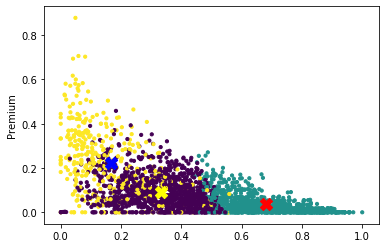

In [81]:
plt.scatter(product_kmeans3.Sneakers, product_kmeans3.Hats, c=product_kmeans3.labels3clus, s=10)
plt.scatter(centroid_0_Sneakers, centroid_0_Hats, marker='X', s=150, color='yellow')
plt.scatter(centroid_1_Sneakers, centroid_1_Hats, marker='X', s=150, color='red')
plt.scatter(centroid_2_Sneakers, centroid_2_Hats, marker='X', s=150, color='blue')
plt.ylabel('Premium')
plt.show()

<a id='PDBSCAN'></a>
### 3.2  <u>DBSCAN</u>

We applied DBSCAN taking into account the perspective of product usage, creating a new dataframe, named `product_DBSCAN` where we selected features relevant to product segmentation.

In [82]:
product_DBSCAN= product_base.copy()

cl_Prod_DBSCAN = DBSCAN(eps=0.18, min_samples=100).fit(product_DBSCAN)
product_DBSCAN['labels'] = cl_Prod_DBSCAN.labels_
product_DBSCAN.groupby(['labels']).describe().transpose()

labels                  -1            0
Sneakers count  369.000000  2103.000000
         mean     0.179363     0.485507
         std      0.175166     0.207641
         min      0.000000     0.030303
         25%      0.060345     0.328976
         50%      0.121951     0.466667
         75%      0.227957     0.638185
         max      0.892857     1.000000
TShirts  count  369.000000  2103.000000
         mean     0.172720     0.056396
         std      0.127509     0.056658
         min      0.000000     0.000000
         25%      0.061224     0.012805
         50%      0.157895     0.038462
         75%      0.266667     0.084070
         max      0.681818     0.337553
Rackets  count  369.000000  2103.000000
         mean     0.320014     0.354018
         std      0.163465     0.146966
         min      0.000000     0.000000
         25%      0.211765     0.244779
         50%      0.294355     0.351634
         75%      0.400000     0.457984
         max      0.999189     0.800000
Watches  count  369.000000  2103.000000
         mean     0.109800     0.035058
         std      0.089957     0.036721
         min      0.000000     0.000000
         25%      0.038136     0.007903
         50%      0.092593     0.023490
         75%      0.160305     0.051669
         max      0.492754     0.279514
Hats     count  369.000000  2103.000000
         mean     0.218104     0.069021
         std      0.166401     0.068436
         min      0.000000     0.000000
         25%      0.075472     0.016042
         50%      0.200000     0.049601
         75%      0.340426     0.105796
         max      0.878049     0.352049
Premium  count  369.000000  2103.000000
         mean     0.424870     0.112378
         std      0.223276     0.102645
         min      0.000000     0.000000
         25%      0.236364     0.033551
         50%      0.432432     0.080517
         75%      0.592920     0.164057
         max      1.000000     0.517730

#### Silhouette Metric

In [83]:
#Silhouette Coefficient DBCSCAN
print("Silhouette Coefficient DBSCAN (2 clusters): %0.4f"
      % metrics.silhouette_score(product_DBSCAN, product_DBSCAN["labels"]))

Silhouette Coefficient DBSCAN (2 clusters): 0.6755


#### Data Visualization

In [84]:
cluster0 = product_DBSCAN[product_DBSCAN.labels==-1]
cluster1 = product_DBSCAN[product_DBSCAN.labels==0]

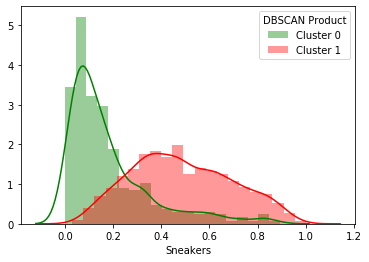

In [85]:
Filtro="Sneakers"
sns.distplot(cluster0[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1[Filtro],color='red',label='Cluster 1', kde = True)
legend = plt.legend(title="DBSCAN Product")

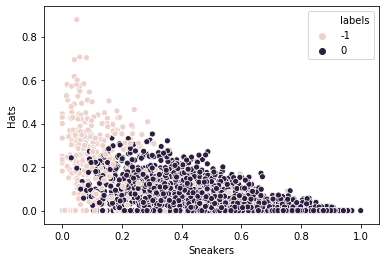

In [86]:
sns.scatterplot(data=product_DBSCAN,x='Sneakers',y='Hats',hue='labels')

<a id='PHierarchical'></a>
### 3.3  <u>Hierarchical Clustering</u>

We applied Hierarchical Clustering taking into account the perspective of product usage, creating a new dataframe, named `product_HC` where we selected features relevant to product segmentation.

In [87]:
product_HC= product_base.copy()

cl_prod_HC = AgglomerativeClustering(n_clusters=3).fit(product_HC)
product_HC['labels'] = cl_prod_HC.labels_
product_HC.groupby(['labels']).describe().transpose()

labels                    0           1           2
Sneakers count  1222.000000  383.000000  867.000000
         mean      0.621238    0.135762    0.318404
         std       0.155986    0.088187    0.108801
         min       0.184615    0.000000    0.000404
         25%       0.505130    0.065129    0.240796
         50%       0.618684    0.120000    0.327574
         75%       0.736132    0.184900    0.394054
         max       1.000000    0.437500    0.555556
TShirts  count  1222.000000  383.000000  867.000000
         mean      0.043368    0.189391    0.065515
         std       0.050455    0.113272    0.055426
         min       0.000000    0.000000    0.000000
         25%       0.009124    0.106376    0.025366
         50%       0.026189    0.180672    0.050847
         75%       0.065465    0.264151    0.092725
         max       0.366667    0.681818    0.323077
Rackets  count  1222.000000  383.000000  867.000000
         mean      0.252478    0.318635    0.498291
         std       0.090072    0.119387    0.102989
         min       0.000000    0.000000    0.258065
         25%       0.184000    0.230769    0.430731
         50%       0.257195    0.312977    0.479167
         75%       0.324272    0.409742    0.555556
         max       0.456522    0.642857    0.999189
Watches  count  1222.000000  383.000000  867.000000
         mean      0.027505    0.112398    0.043349
         std       0.034774    0.086431    0.036017
         min       0.000000    0.000000    0.000000
         25%       0.006070    0.046710    0.015252
         50%       0.015818    0.097561    0.035778
         75%       0.038482    0.154967    0.062178
         max       0.268657    0.492754    0.214286
Hats     count  1222.000000  383.000000  867.000000
         mean      0.055410    0.243814    0.074441
         std       0.065486    0.143590    0.060501
         min       0.000000    0.000000    0.000000
         25%       0.000000    0.146341    0.030092
         50%       0.033538    0.229885    0.062670
         75%       0.082427    0.333333    0.109799
         max       0.392857    0.878049    0.330840
Premium  count  1222.000000  383.000000  867.000000
         mean      0.119990    0.349392    0.129945
         std       0.126146    0.237947    0.125380
         min       0.000000    0.000000    0.000000
         25%       0.033942    0.152221    0.031503
         50%       0.078947    0.316969    0.085776
         75%       0.163409    0.533423    0.194330
         max       0.828571    1.000000    0.611111

#### Silhouette Metric

In [88]:
#Silhouette Coefficient Agglomerative Clustering
print("Silhouette Coefficient HC (3 clusters): %0.4f"
      % metrics.silhouette_score(product_HC, product_HC["labels"]))

Silhouette Coefficient HC (3 clusters): 0.7328


#### Data Visualization

In [89]:
cluster0_HC = product_HC[product_HC.labels==0]
cluster1_HC = product_HC[product_HC.labels==1]
cluster2_HC = product_HC[product_HC.labels==2]

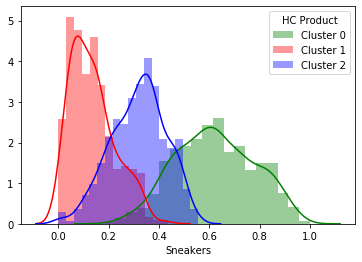

In [90]:
Filtro="Sneakers"
sns.distplot(cluster0_HC[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_HC[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_HC[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="HC Product")

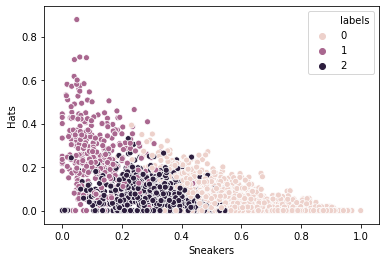

In [91]:
sns.scatterplot(data=product_HC,x='Sneakers',y='Hats',hue='labels')

<a id='PKMedoids'></a>
### 3.4 <u>K-medoids</u>

We applied K-medoids taking into account the perspective of product usage, creating a new dataframe, named `product_kmedoids` where we selected features relevant to product segmentation.

In [92]:
product_kmedoids= product_base.copy()

cl_prod_Kmedoids = KMedoids(n_clusters=3, random_state=0).fit(product_kmedoids)
product_kmedoids['labels'] = cl_prod_Kmedoids.labels_
product_kmedoids.groupby(['labels']).describe().transpose()

labels                   0           1           2
Sneakers count  774.000000  796.000000  902.000000
         mean     0.197320    0.708342    0.410910
         std      0.118162    0.110801    0.088911
         min      0.000000    0.451791    0.165490
         25%      0.106383    0.622222    0.345675
         50%      0.184413    0.696167    0.414524
         75%      0.272727    0.796849    0.479078
         max      0.588235    1.000000    0.600000
TShirts  count  774.000000  796.000000  902.000000
         mean     0.138653    0.028458    0.058053
         std      0.105258    0.036282    0.049997
         min      0.000000    0.000000    0.000000
         25%      0.057692    0.000000    0.024000
         50%      0.117265    0.013668    0.047411
         75%      0.196102    0.039103    0.082951
         max      0.681818    0.249773    0.337553
Rackets  count  774.000000  796.000000  902.000000
         mean     0.402361    0.214883    0.421408
         std      0.161231    0.077774    0.102377
         min      0.000000    0.000000    0.125000
         25%      0.280416    0.157077    0.351797
         50%      0.399113    0.216043    0.416254
         75%      0.501913    0.274127    0.487292
         max      0.999189    0.380952    0.779427
Watches  count  774.000000  796.000000  902.000000
         mean     0.085499    0.016554    0.038681
         std      0.073449    0.022395    0.034156
         min      0.000000    0.000000    0.000000
         25%      0.033898    0.000000    0.014509
         50%      0.068825    0.008348    0.030183
         75%      0.117647    0.023271    0.053639
         max      0.492754    0.200000    0.268657
Hats     count  774.000000  796.000000  902.000000
         mean     0.176167    0.031764    0.070948
         std      0.134600    0.041300    0.056546
         min      0.000000    0.000000    0.000000
         25%      0.075021    0.000000    0.029858
         50%      0.153846    0.017217    0.062585
         75%      0.249749    0.048527    0.105820
         max      0.878049    0.270852    0.277778
Premium  count  774.000000  796.000000  902.000000
         mean     0.287467    0.118540    0.084535
         std      0.211017    0.123476    0.078323
         min      0.000000    0.000000    0.000000
         25%      0.116269    0.033846    0.026632
         50%      0.235719    0.073405    0.058908
         75%      0.420903    0.164912    0.124973
         max      1.000000    0.828571    0.444444

#### Silhouette Metric

In [93]:
#Silhouette Coefficient Kmedoids3
print("Silhouette Coefficient K-medoids (3 clusters): %0.4f"
      % metrics.silhouette_score(product_kmedoids, product_kmedoids["labels"]))

Silhouette Coefficient K-medoids (3 clusters): 0.7373


#### Data Visualization

In [94]:
cluster0_Kmedoids = product_kmedoids[product_kmedoids.labels==0]
cluster1_Kmedoids = product_kmedoids[product_kmedoids.labels==1]
cluster2_Kmedoids = product_kmedoids[product_kmedoids.labels==2]

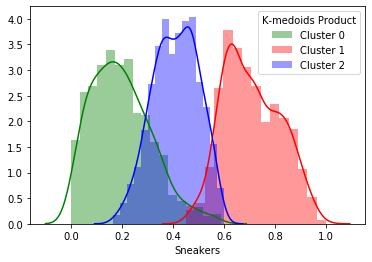

In [95]:
Filtro="Sneakers"
sns.distplot(cluster0_Kmedoids[Filtro],color='green',label='Cluster 0', kde = True)
sns.distplot(cluster1_Kmedoids[Filtro],color='red',label='Cluster 1', kde = True)
sns.distplot(cluster2_Kmedoids[Filtro],color='blue',label='Cluster 2', kde = True)
legend = plt.legend(title="K-medoids Product")

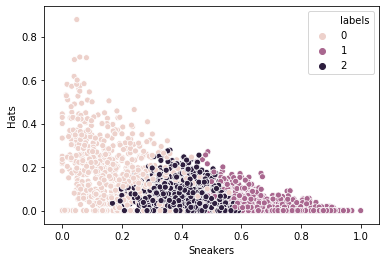

In [96]:
sns.scatterplot(data=product_kmedoids,x='Sneakers',y='Hats',hue='labels')

In [97]:
print("Product View:")

#Silhouette Coefficient Kmeans3
print("Silhouette Coefficient K-means (3 clusters): %0.4f"
      % metrics.silhouette_score(product_kmeans3, product_kmeans3["labels3clus"]))

#Silhouette Coefficient DBCSCAN
print("Silhouette Coefficient DBSCAN (2 clusters): %0.4f"
      % metrics.silhouette_score(product_DBSCAN, product_DBSCAN["labels"]))

#Silhouette Coefficient Agglomerative Clustering
print("Silhouette Coefficient HC (3 clusters): %0.4f"
      % metrics.silhouette_score(product_HC, product_HC["labels"]))

#Silhouette Coefficient Kmedoids3
print("Silhouette Coefficient K-medoids (3 clusters): %0.4f"
      % metrics.silhouette_score(product_kmedoids, product_kmedoids["labels"]))
 

Product View:
Silhouette Coefficient K-means (3 clusters): 0.7401
Silhouette Coefficient DBSCAN (2 clusters): 0.6755
Silhouette Coefficient HC (3 clusters): 0.7328
Silhouette Coefficient K-medoids (3 clusters): 0.7373


Comparing the analysis for all algorithms tested, we concluded that K-means and K-medoids had the best results. As is known, K-medoids is less sensitive to outliers when compared to K-means, so we decided onto K-medoids.

#### By checking the table of K-medoids clustering, it is possible to understand the distinct "behaviour" of the customers according to the cluster they belong to.

__Cluster0:__ This cluster is composed of 774 customers, and can be considered the cluster that groups the individuals that buy more premium products. The money spent by these customers in the store is mainly on Rackets, but they are also the ones that spent more in the Hats, Watches and TShirts categories.

__Cluster1:__ This cluster is composed of 796 customers. The money spent by these customers in the store is mainly on Sneakers, being the group that buys more Sneakers.

__Cluster2:__ This cluster is the biggest one, being composed of 902 customers. The money spent by these customers in the store is mainly on Sneakers and Rackets.